In [1]:
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import matplotlib.gridspec as gridspec
import spectral_analysis as sa
from scipy.special import erf
import datafidelity as df
import composite

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
all_uv = "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))"
SN_Array = composite.grab(all_uv, multi_epoch = True, make_corr = False)
for SN in SN_Array:
    if SN.minwave < 2800.:
        print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave

In [ ]:
print 'Need Phases:'
for SN in SN_Array:
    if SN.phase == None:
        print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave
print
print 'Need dm15s:'
for SN in SN_Array:
    if SN.dm15_source == None and SN.dm15_from_fits == None:
        print SN.name, SN.filename, SN.mjd, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave

In [ ]:
test_uv_query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase between -3 and 3 and source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))"]
comp_test_uv, sn_arrays_test_uv, boot_sn_arrays_test_uv = query_db.main(len(test_uv_query), test_uv_query, boot='nb', medmean=2, verbose=True, multi_epoch=False, selection='max_coverage')

In [ ]:
dm15s = []
for SN in sn_arrays_test_uv[0]:
    if SN.dm15_source != None:
        dm15s.append(SN.dm15_source)
    else:
        dm15s.append(SN.dm15_from_fits)
plt.hist(dm15s, bins = 20)
plt.show()

In [8]:
query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42))",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7))",
                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7))"]
# query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source < .95 or dm15_from_fits < .95)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25)) and source != 'swift_uv' and Supernovae.SN not in ('2006x', '2008ia')",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7)) and source != 'swift_uv'",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 2 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7)) and source != 'swift_uv'"]
# query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and (dm15_cfa < .9 or dm15_from_fits < .9)",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= .9 and dm15_cfa < 1.) or (dm15_from_fits >= .9 and dm15_from_fits < 1))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1 and dm15_cfa < 1.05) or (dm15_from_fits >= 1 and dm15_from_fits < 1.05))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.05 and dm15_cfa < 1.1) or (dm15_from_fits >= 1.05 and dm15_from_fits < 1.1))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.1 and dm15_cfa < 1.2) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.2))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.2 and dm15_cfa < 1.3) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.3))", 
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.3 and dm15_cfa < 1.4) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.4))", 
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_cfa >= 1.4 and dm15_cfa < 1.6) or (dm15_from_fits >= 1.4 and dm15_from_fits < 1.6))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and (dm15_cfa >= 1.6 or dm15_from_fits >= 1.6)"]

In [42]:
comps_dm15_max_fewer_bins_med, sn_arrays_med, boot_sn_arrays_med = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='b', medmean=2, gini_balance=False, verbose=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))
99 questionable files currently ignored
(1, 'questionable spectra removed', 85, 'spectra left')
(0, 'Peculiar Ias removed', 85, 'spectra left')
82 valid spectra found
Arrays cleaned
0 spectra may have telluric contamination


composite.py:1068: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  
composite.py:1105: RuntimeWarning: divide by zero encountered in divide
  template.SNR = np.median(template.flux[template.x1:template.x2] / error[template.x1:template.x2])
composite.py:600: RuntimeWarning: invalid value encountered in sqrt
  
composite.py:1105: RuntimeWarning: invalid value encountered in sqrt
  template.SNR = np.median(template.flux[template.x1:template.x2] / error[template.x1:template.x2])


29 total SNe
2005eq_combined None 80.8758461929 None None 0.88 0.101631251668 0.028977 bsnip 3230.0 10204.0 15.0 0.5011 None None
2006ot_combined None 68.2114013679 None None 0.84 0.107199587481 0.0531 bsnip 2960.0 8782.0 10.0 0.8797 None None
2004as_combined None 116.476783416 None None 0.92 0.512483751919 0.031021 cfa 3612.0 7312.0 None 0.2321 None None
2006gr_combined None 30.7208236816 None None 0.81 -1.32852697132 0.034597 cfa 3366.0 7172.0 12.0 0.3222 None None
1994s_combined None 57.6169582791 None None 0.94 0.991132532323 0.015177 bsnip 3076.0 11130.0 11.0 0.00291627 None None
1999dq_combined None 322.12336304 None None 0.86 -0.219859209632 0.014327 cfa 3670.0 7432.0 14.0 0.4492 None None
2006oa_combined None 32.9101875586 None None 0.89 -0.969957645053 0.06 cfa 3282.0 6992.0 None 0.2003 None None
2009ig_combined None 13.384061306 None None 0.89 -0.46351976415 0.00877 swift_uv 1886.0 6726.0 10.0 0.00157685 None None
2002cd_combined None 54.8413409888 None None 0.84 1.3362834873

In [43]:
SN = sn_arrays_med[0][0]
print np.median(SN.ivar[SN.x1:SN.x2])

190817.232518


In [56]:
comps_dm15_max_fewer_bins_mean, sn_arrays_mean, boot_sn_arrays_mean = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='b', medmean=1, gini_balance=True, verbose=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))
102 questionable files currently ignored
(1, 'questionable spectra removed', 85, 'spectra left')
(0, 'Peculiar Ias removed', 85, 'spectra left')
82 valid spectra found
Arrays cleaned
0 spectra may have telluric contamination


composite.py:1114: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  
composite.py:1151: RuntimeWarning: divide by zero encountered in divide
  modified) SN_Array used to create the composite spectrum, and a list
composite.py:605: RuntimeWarning: invalid value encountered in sqrt
  with the same size as the original sample. The number of samples is defined
composite.py:1151: RuntimeWarning: invalid value encountered in sqrt
  modified) SN_Array used to create the composite spectrum, and a list


29 total SNe
2005eq_combined None 80.8758461929 0.88 0.101631251668 bsnip 15.0 0.5011 3230.0 10204.0
2006ot_combined None 68.2114013679 0.84 0.107199587481 bsnip 10.0 0.8797 2960.0 8782.0
2004as_combined None 116.476783416 0.92 0.512483751919 cfa None 0.2321 3612.0 7312.0
2006gr_combined None 30.7208236816 0.81 -1.32852697132 cfa 12.0 0.3222 3366.0 7172.0
1994s_combined None 57.6169582791 0.94 0.991132532323 bsnip 11.0 0.00291627 3076.0 11130.0
1999dq_combined None 322.12336304 0.86 -0.219859209632 cfa 14.0 0.4492 3670.0 7432.0
2006oa_combined None 32.9101875586 0.89 -0.969957645053 cfa None 0.2003 3282.0 6992.0
2009ig_combined None 13.384061306 0.89 -0.46351976415 swift_uv 10.0 0.00157685 1886.0 6726.0
2002cd_combined None 54.8413409888 0.84 1.33628348735 bsnip 13.0 1.3704 3270.0 10292.0
2013dy_combined None 79.8314145607 0.92 -0.777589062635 foley_hst 17.0 0.5015 1596.0 10188.0
2001cp_combined None 56.339154453 0.88 0.565538514582 bsnip 13.0 0.00283719 3230.0 10172.0
2006s_combined N

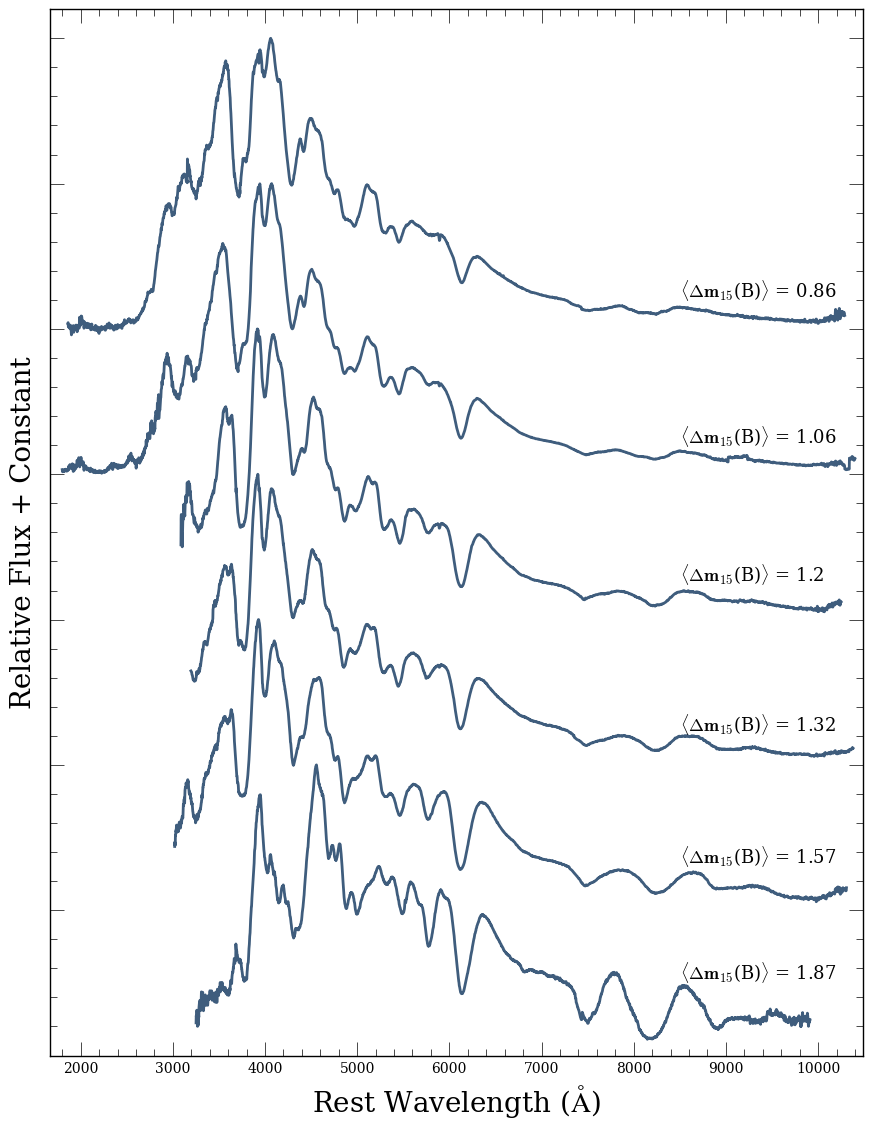

In [57]:
query_db.set_min_num_spec(comps_dm15_max_fewer_bins_mean, 3)
# query_db.stacked_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/dm15_split_max')
query_db.stacked_plot(comps_dm15_max_fewer_bins_mean)

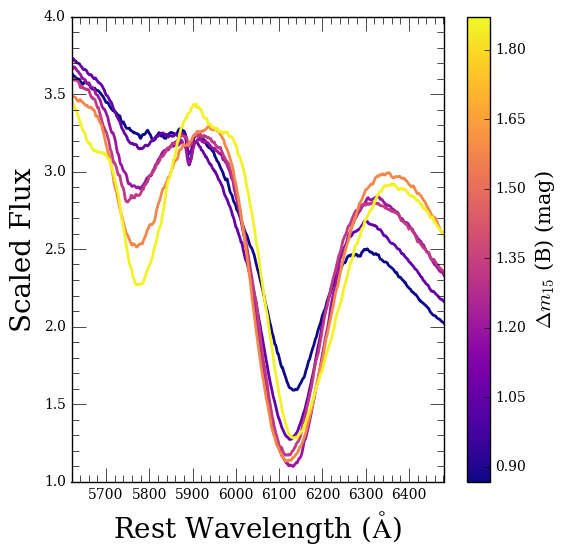

In [58]:
# query_db.si_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/si_region')
query_db.si_plot(comps_dm15_max_fewer_bins_mean)

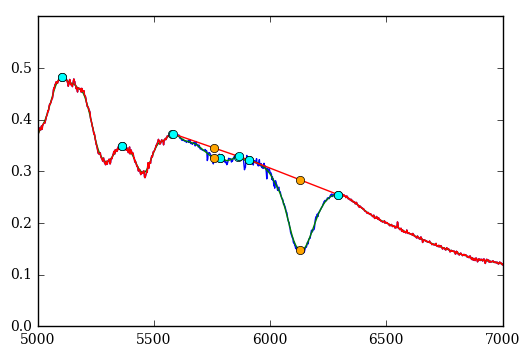

0.89 0.144089582335


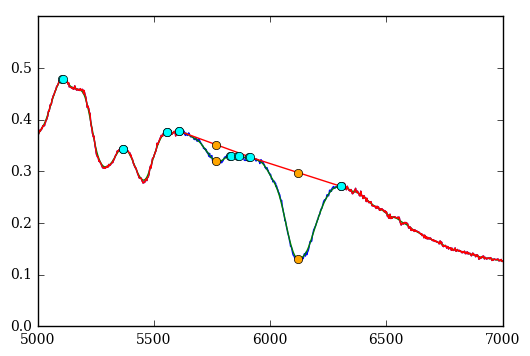

1.07 0.189138367464


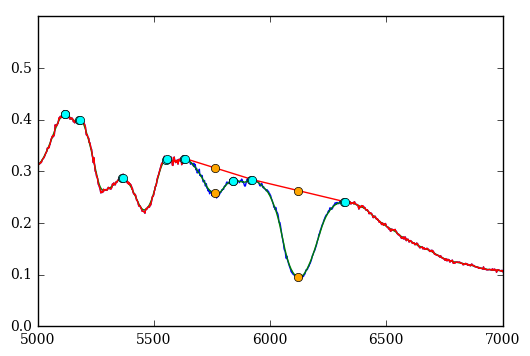

1.2 0.295208549765


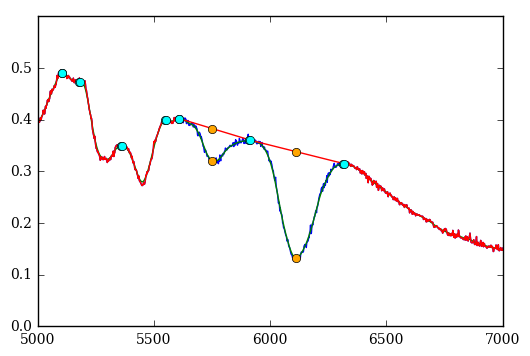

1.33 0.301943156882


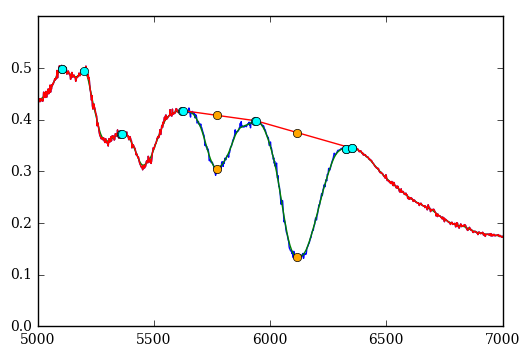

1.58 0.430768354676


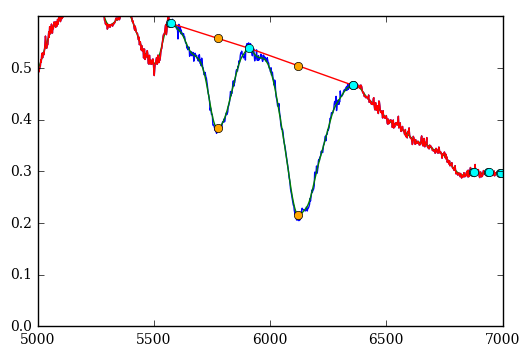

1.89 0.600830530286


In [47]:
si_ratios_med = []
phases_med = []
dm15s_med = []
for comp in comps_dm15_max_fewer_bins_med:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.002, dm15=dm15)
    print dm15, r
    phases_med.append(p)
    dm15s_med.append(dm15)
    si_ratios_med.append(r)

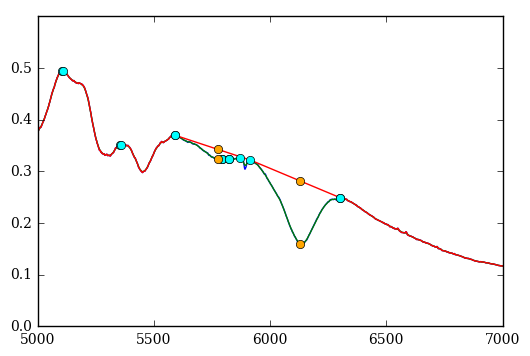

0.87 0.158974812837


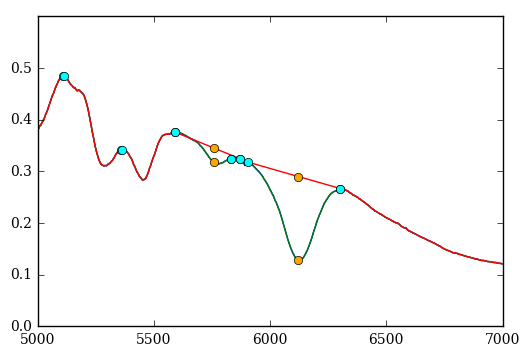

1.06 0.165067602951


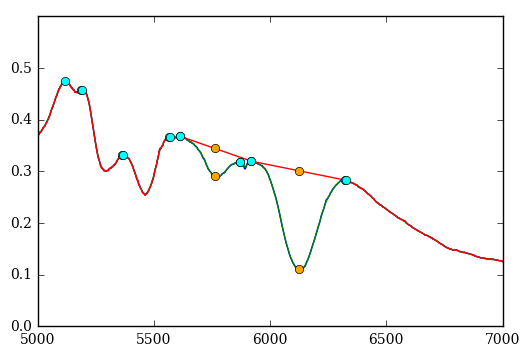

1.2 0.281977711451


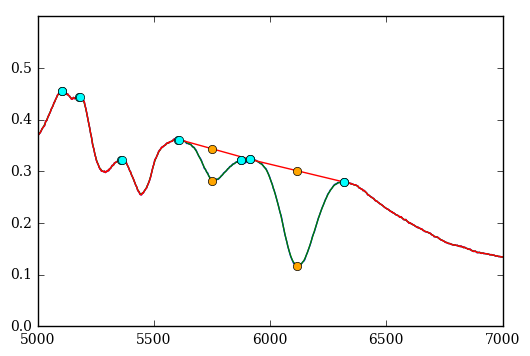

1.32 0.335538140082


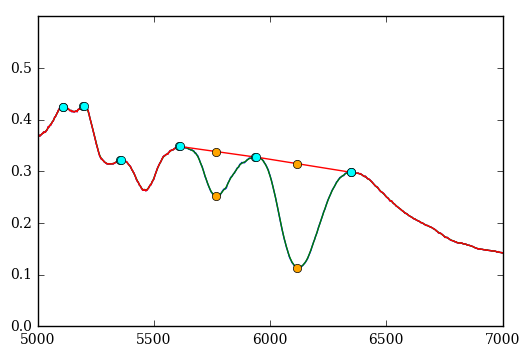

1.57 0.428103500523


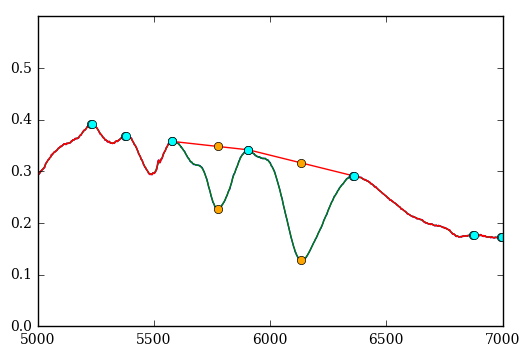

1.87 0.643304490876


In [48]:
si_ratios_mean = []
phases_mean = []
dm15s_mean = []
for comp in comps_dm15_max_fewer_bins_mean:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, dm15=dm15)
    print dm15, r
    phases_mean.append(p)
    dm15s_mean.append(dm15)
    si_ratios_mean.append(r)

In [49]:
boot_ratios_med = []
errors_med  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_med)):
    rs = []
    print k
    for comp in boot_sn_arrays_med[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
        if k != len(boot_sn_arrays_mean) - 1:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
            if ~np.isnan(r):
                rs.append(r)
        else:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False, dm15=1.8)
            if ~np.isnan(r) and r > .5: #some bad measurements below .5
                rs.append(r)
    boot_ratios_med.append(rs)

0
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
1
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could 

In [50]:
boot_ratios_mean = []
errors_mean  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_mean)):
    rs = []
    print k
    for comp in boot_sn_arrays_mean[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
        if k != len(boot_sn_arrays_mean) - 1:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
            if ~np.isnan(r):
                rs.append(r)
        else:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False, dm15=1.8)
            if ~np.isnan(r) and r > .5: #some bad measurements below .5
                rs.append(r)
        
    boot_ratios_mean.append(rs)

0
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
1
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could 

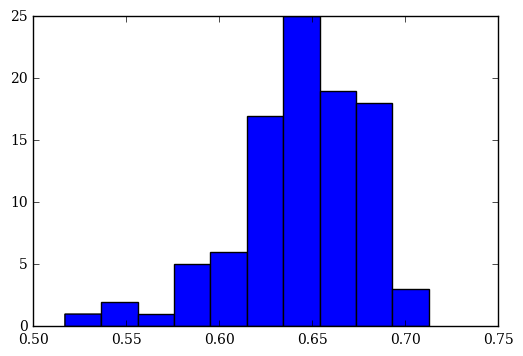

In [51]:
plt.hist(boot_ratios_mean[-1])
plt.show()

In [52]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_med = np.asarray(boot_ratios_med)
for j in range(len(boot_ratios_med)):
    r_resids = []
    r_resids.append(boot_ratios_med[j] - si_ratios_med[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_med = [low_errors, up_errors]

In [53]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_mean = np.asarray(boot_ratios_mean)
for j in range(len(boot_ratios_mean)):
    r_resids = []
    r_resids.append(boot_ratios_mean[j] - si_ratios_mean[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_mean = [low_errors, up_errors]

0
0.132417851195 190817.232518


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in divide


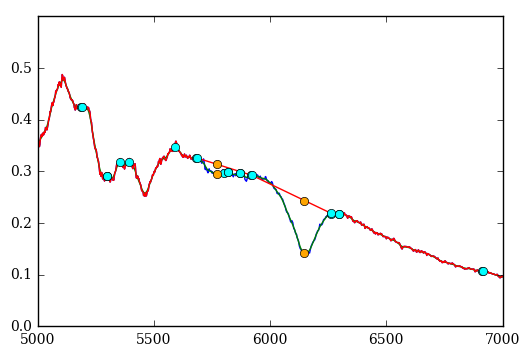

2005eq_combined 0.88 0.196912021589 Check:  0.0015 83.4622665798 80.8758461929
0.20129233562 169374.57101


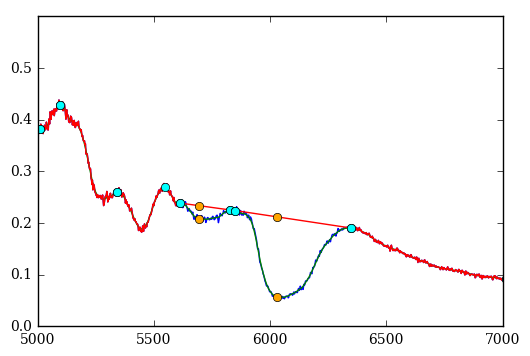

2006ot_combined 0.84 0.162126386003 Check:  0.0015 65.1189559683 68.2114013679
0.356941590773 115475.127629


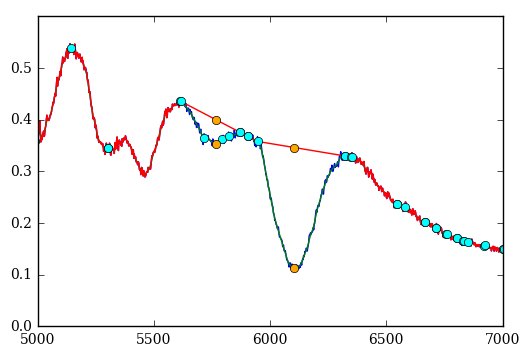

2004as_combined 0.92 0.204416431339 Check:  0.001 111.713812766 116.476783416
0.313302831448 9942.61322212


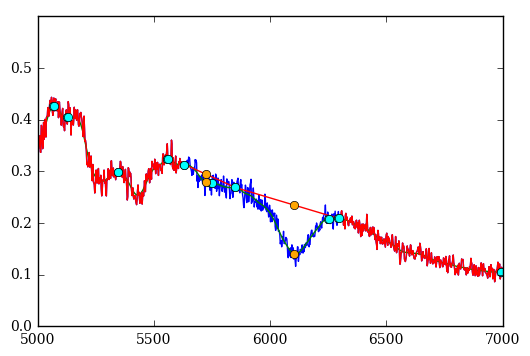

2006gr_combined 0.81 0.16883405274 Check:  0.003 28.9410384195 30.7208236816
0.114750771235 150177.692909


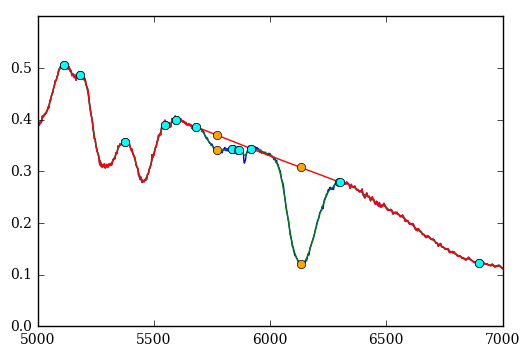

1994s_combined 0.94 0.155499639143 Check:  0.0015 73.4038303476 57.6169582791
0.351022628211 1106778.83385


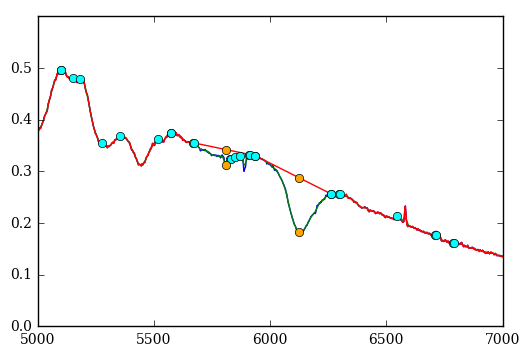

1999dq_combined 0.86 0.276595923042 Check:  0.001 311.369396594 322.12336304
0.375152534645 8191.24601438


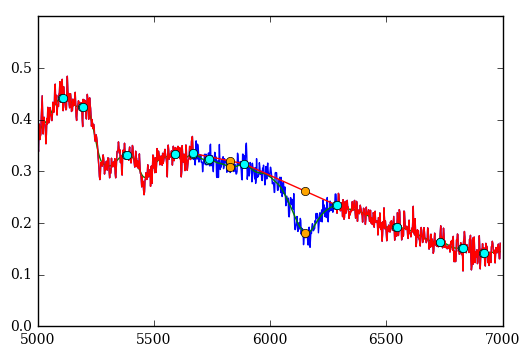

2006oa_combined 0.89 0.142627829659 Check:  0.003 30.9582262713 32.9101875586
0.118666559145 282264.80181


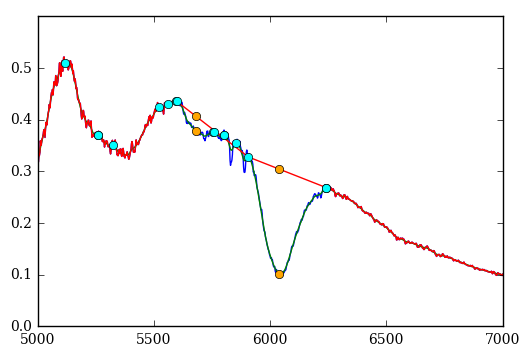

2002cd_combined 0.84 0.142380892659 Check:  0.0015 60.9818681278 54.8413409888
0.142350976382 243384.552716


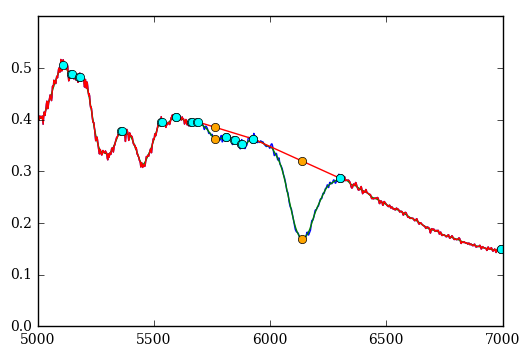

2013dy_combined 0.92 0.150377478162 Check:  0.0015 90.5608535948 79.8314145607
0.169514339747 73221.7867965


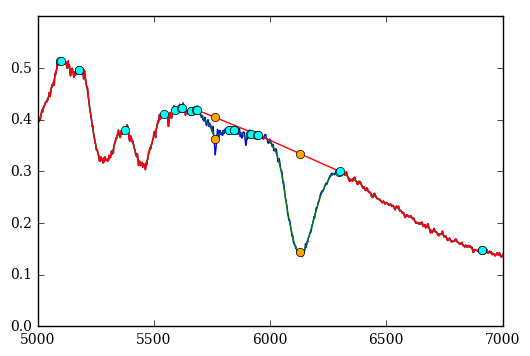

2001cp_combined 0.88 0.221981478642 Check:  0.0015 60.9277460909 56.339154453
0.160501130754 73150.6297665


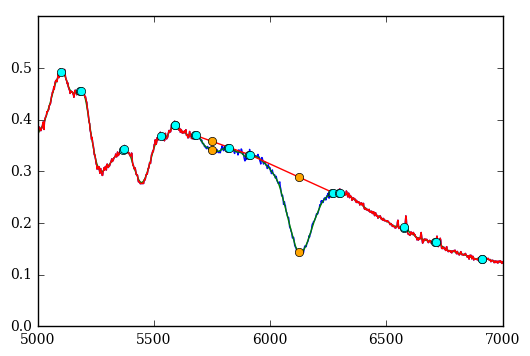

2006s_combined 0.93 0.120180679927 Check:  0.0015 73.5045633826 65.7414860282
0.181142861666 155391.927323


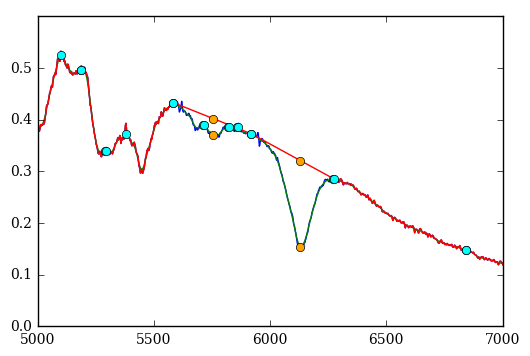

2001eh_combined 0.92 0.190627206192 Check:  0.0015 81.4443467802 82.6125601845
0.0890468727505 3600.84634986
Could not find maximum in a specified range!
1991t_combined 0.898541050009 nan Check:  0.004 15.036492387 10.7499148069
0.311501187502 464294.425711


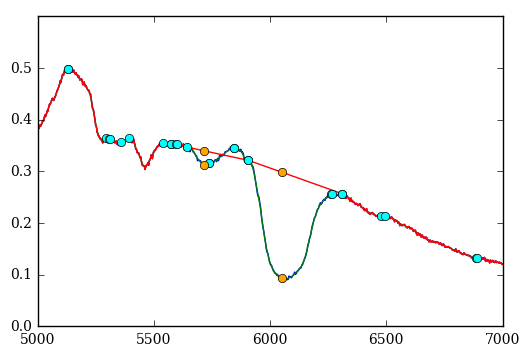

2001ay_combined 0.68 0.137106419698 Check:  0.001 165.787975629 172.224554614
0.385457571421 6541.545206


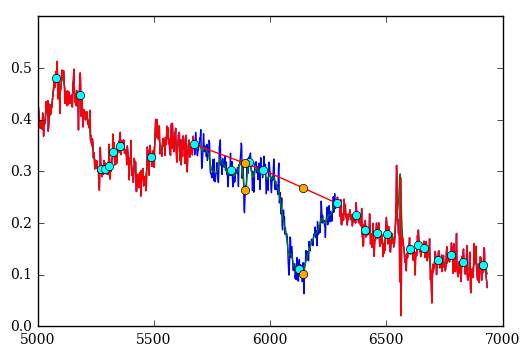

2006cj_combined 0.81 0.310788507542 Check:  0.001 nan nan
0.135735389884 383424.205381


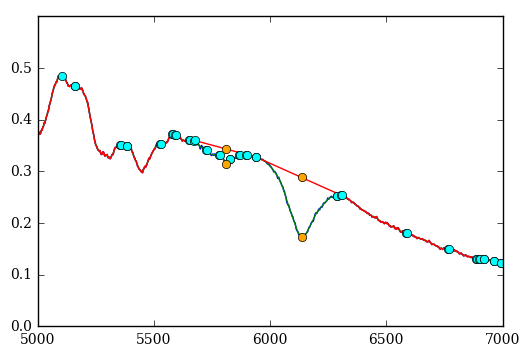

1999aa_combined 0.78 0.254426898956 Check:  0.001 139.73670508 125.027265437
0.160599688023 2102920.26245


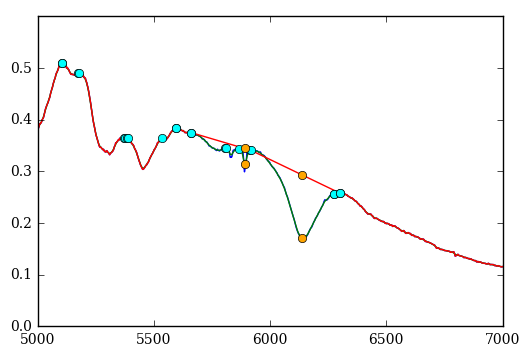

1998es_combined 0.85 0.238995896189 Check:  0.001 283.932390137 280.148662862
0.355603953168 94820.0222256


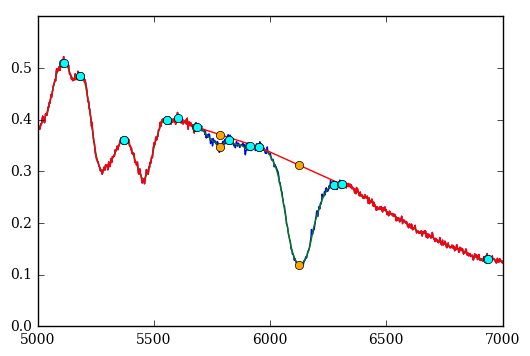

2002jy_combined 0.88 0.126579342339 Check:  0.0015 91.4641325629 99.2731311171
0.368117544972 58589.1837657


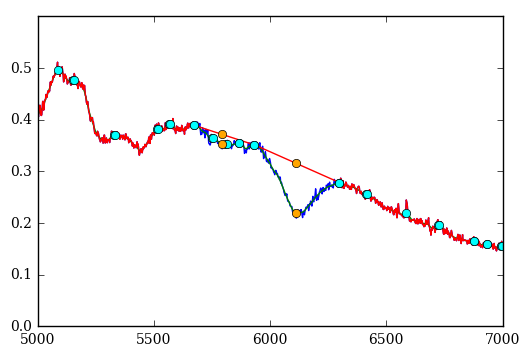

1999gp_combined 0.87 0.195168687491 Check:  0.0015 76.6931400502 80.4530241236
0.200965448485 872461.315653


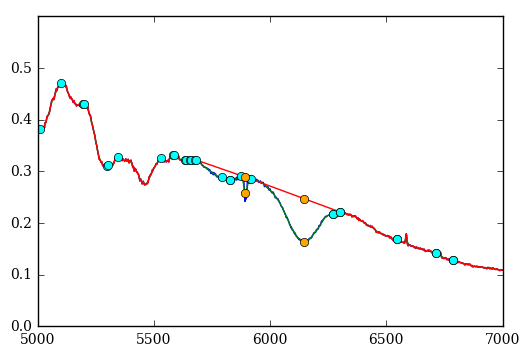

2007s_combined 0.94 0.363766891508 Check:  0.001 157.228609102 178.41642354
0.182074323216 132684.62259


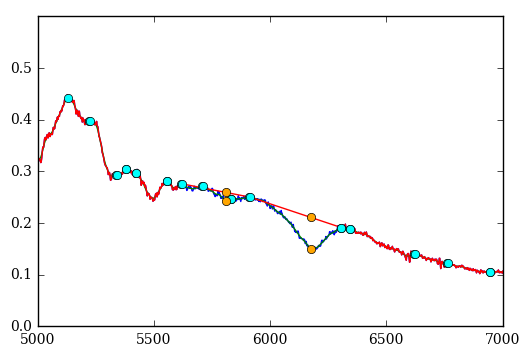

2005m_combined 0.87 0.263210381018 Check:  0.0015 82.4469531693 95.7181666325
0.154223681452 11436.4873921


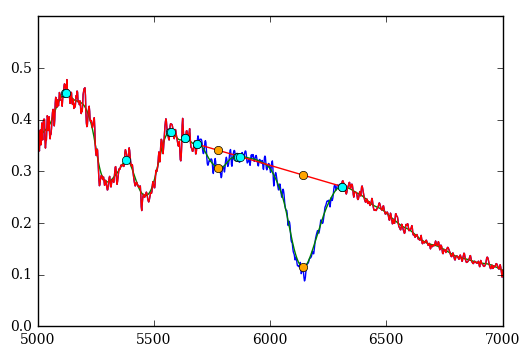

2006cq 0.938834805412 0.195442990621 Check:  0.003 22.5351167742 10.9565777676
0.377700071535 23157.4332617


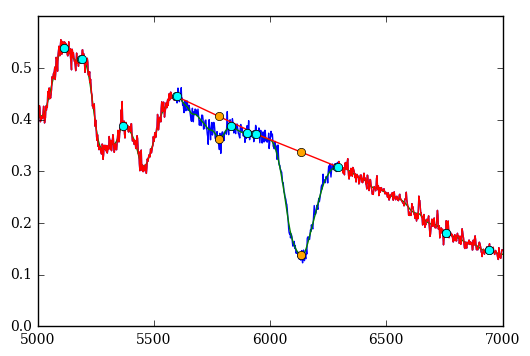

1996c 0.93 0.213546261355 Check:  0.002 49.0926125821 27.3447953372
0.172351923774 23907.8349787


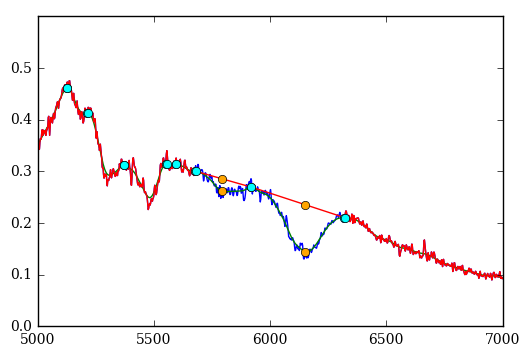

2007ai 0.852109516951 0.272075925903 Check:  0.003 29.3055729243 20.0883943654
0.158861259101 353603.608134


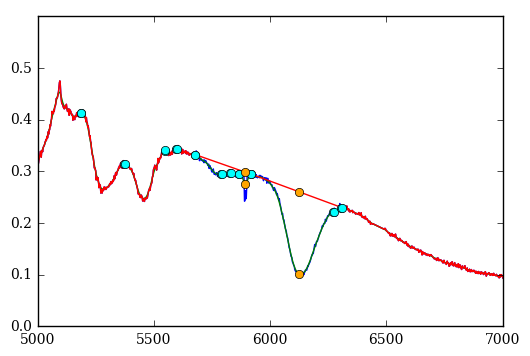

2007ca 0.89 0.148901552689 Check:  0.0015 86.5337995873 32.9253573263
0.0571863572887 2474.16856157
Could not find maximum in a specified range!
1990n 0.943599627942 nan Check:  0.004 7.30097433101 2.21678966512
1
0.266450847333 4956.03531286


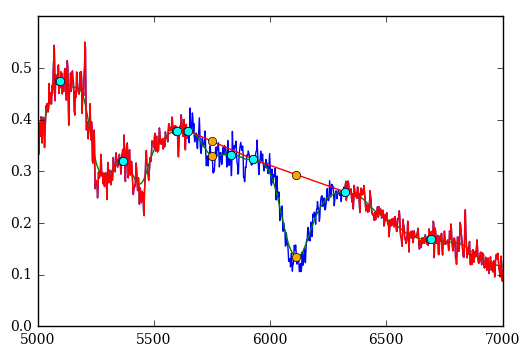

2005ag_combined 1.04651897756 0.175063038638 Check:  0.004 18.1495140206 18.8191713063
0.165653688968 12083145.0421


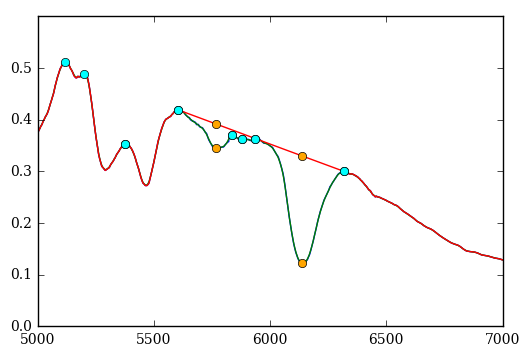

2003du_combined 1.07 0.225198840463 Check:  0.001 966.05319382 963.12397848
0.128818597985 3239515.67306


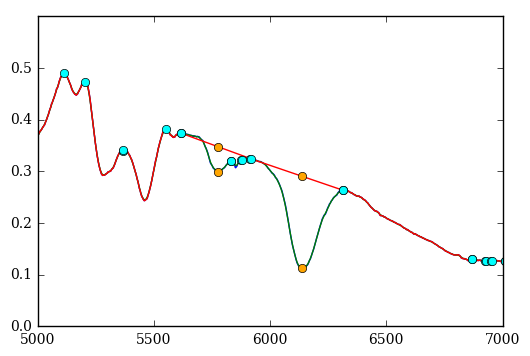

2005cf_combined 1.1 0.273142407799 Check:  0.001 380.931662208 242.032716573
0.339702942562 24455.5546572


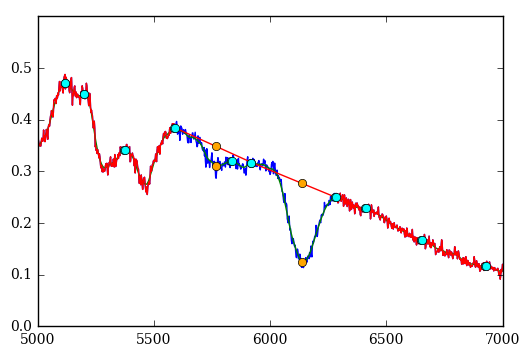

2002ck_combined 1.08 0.246830286908 Check:  0.002 44.6855114207 48.4076628808
0.317454508411 1548828.81139


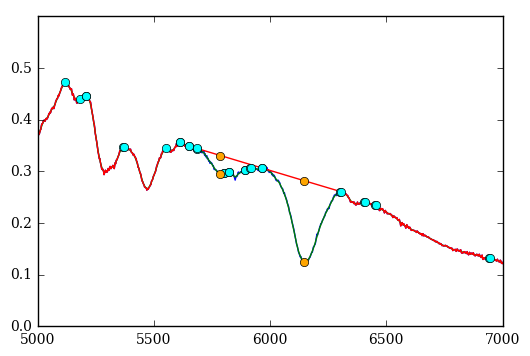

2002fk_combined 1.13 0.226073753316 Check:  0.001 343.303169977 367.76380162
0.323384248294 5126970.41099


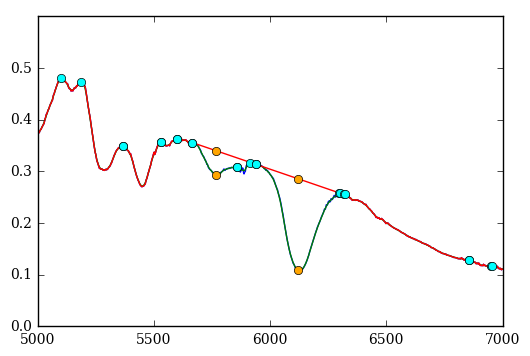

1998bu_combined 1.03 0.264266398648 Check:  0.001 606.931253606 655.841489047
0.102233264524 155289.759039


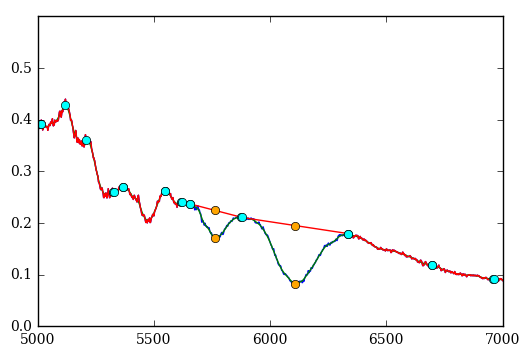

2006bt_combined 1.0 0.479266639316 Check:  0.0015 61.828222572 57.2570117776
0.137816355378 5994577.08735


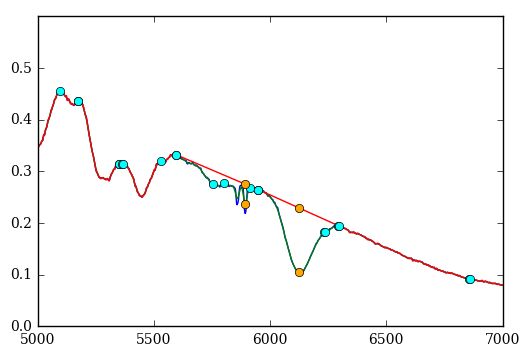

2008fp_combined 0.979300806419 0.306159937591 Check:  0.001 231.310846196 222.339568005
0.212111364987 1039090.04867


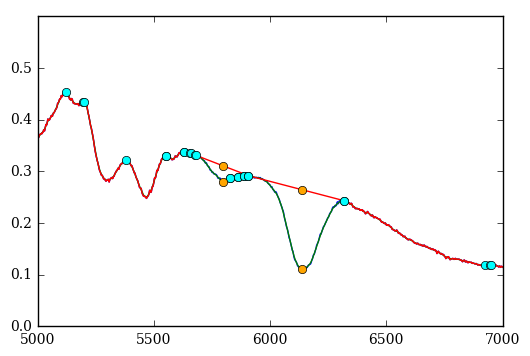

2006ax_combined 1.06 0.206646247316 Check:  0.001 189.791206017 201.506948682
0.306979903896 218252.762548


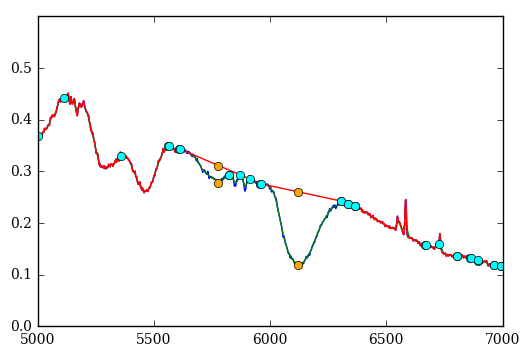

1997dt_combined 1.04 0.234016909567 Check:  0.001 120.5253568 123.236898679
0.157639140843 3058126.43264


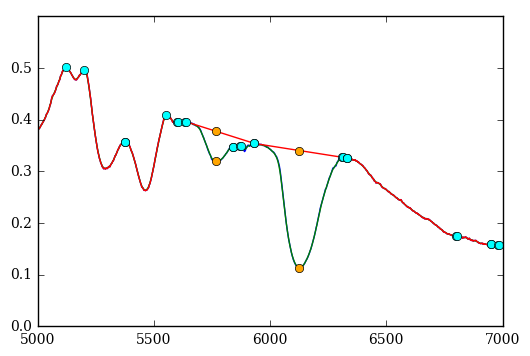

2007af_combined 1.04 0.257448795515 Check:  0.001 403.652814765 341.460268861
0.246451698927 837327.246903


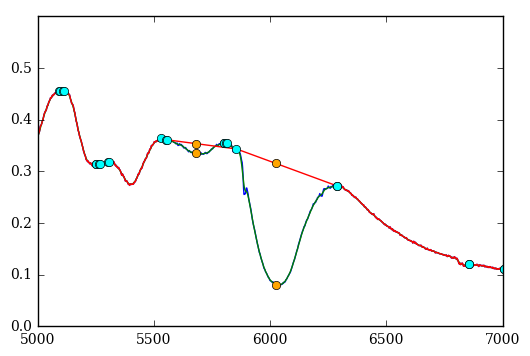

1997bp_combined 1.08 0.0813611155091 Check:  0.001 182.231888812 187.229791718
0.142514514474 4345706.4494


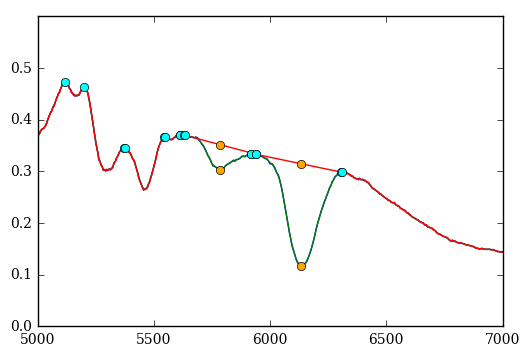

2011fe_combined 1.108 0.245170106104 Check:  0.001 428.7659982 428.097970717
0.12385577086 122437.444421


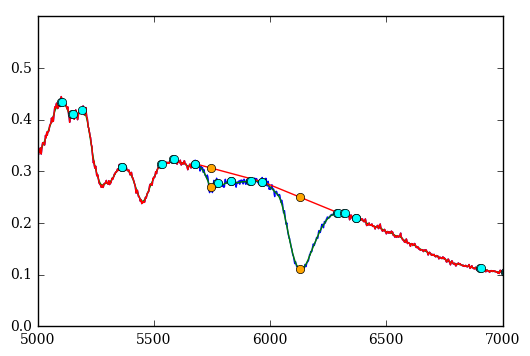

2005na_combined 1.09 0.268706896998 Check:  0.0015 63.4425324934 60.564173858
0.324496218004 3469220.32727


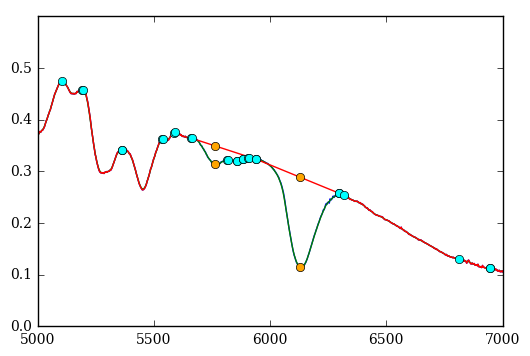

1998aq_combined 1.11 0.205456916418 Check:  0.001 524.719822724 566.620032357
0.166689046299 2884721.2707


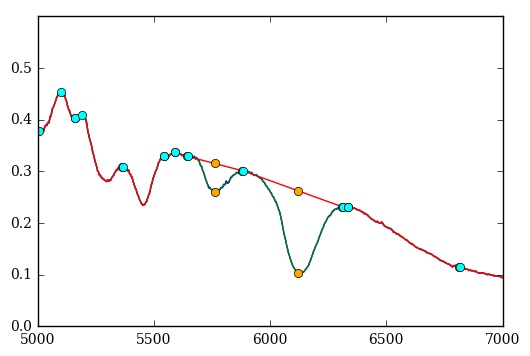

2008hv_combined 1.13369017264 0.346301851057 Check:  0.001 216.874781318 206.251476829
0.216607745527 21366.5012509


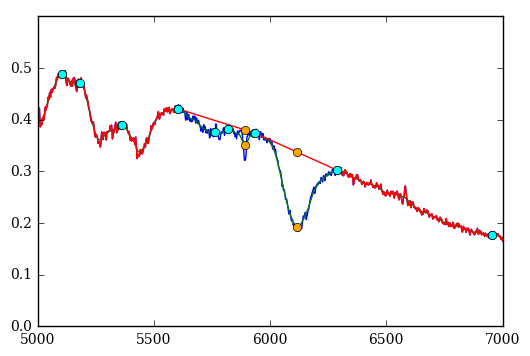

2002de_combined 0.96 0.197397969919 Check:  0.002 49.3737472753 36.1935799035
0.195908621656 320.960534764
Could not find maximum in a specified range!
1981b_combined 1.05664955847 nan Check:  0.004 5.62688167797 5.43817163298
0.120913178263 180.863723109
Could not find maximum in a specified range!
1980n_combined 1.13157052606 nan Check:  0.0045 4.23684393325 2.16108650037
0.123792799108 12602733.3971


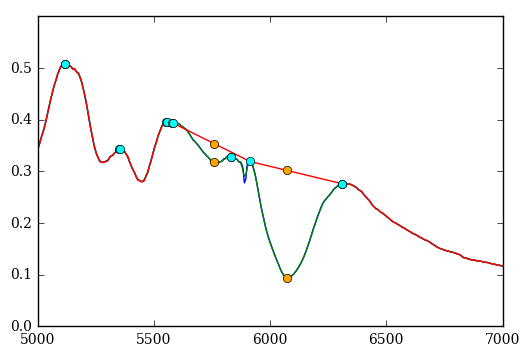

2002bo_combined 1.08 0.175464657099 Check:  0.001 511.266622164 520.595002833
0.40814986797 18853.7669206


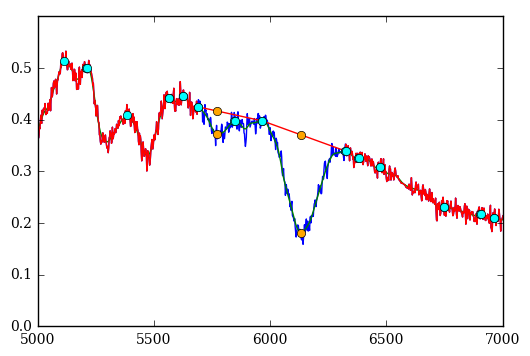

2006cf_combined 1.08357495977 0.234347903172 Check:  0.002 51.3332799845 55.4340770798
0.400903760151 23490.7464587


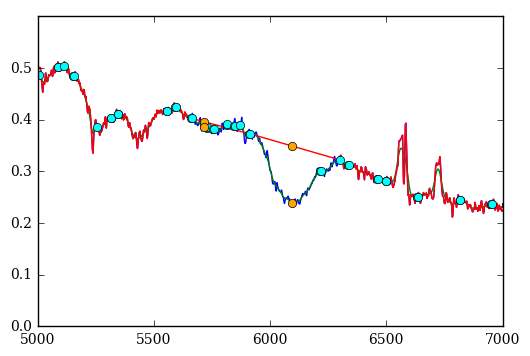

2005ku_combined 1.03987320294 0.102550384543 Check:  0.0015 62.9735640153 67.842176541
0.171702485088 865894.120263


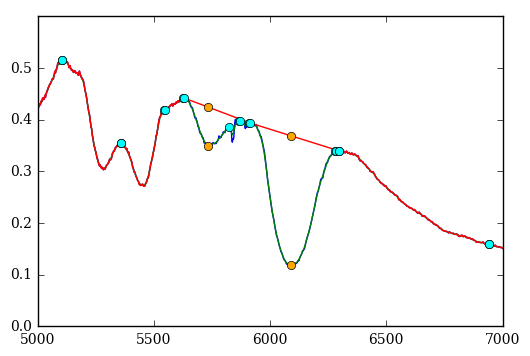

2004fu_combined 1.08 0.298571555021 Check:  0.001 201.012042528 212.891929344
0.163590197823 421063.062528


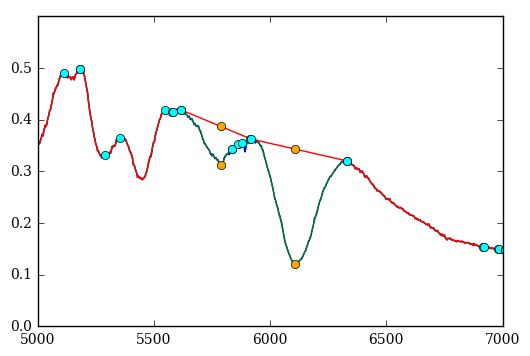

2001da_combined 1.12 0.338120269879 Check:  0.001 160.417641598 168.268302756
0.37169755516 1693358.7956


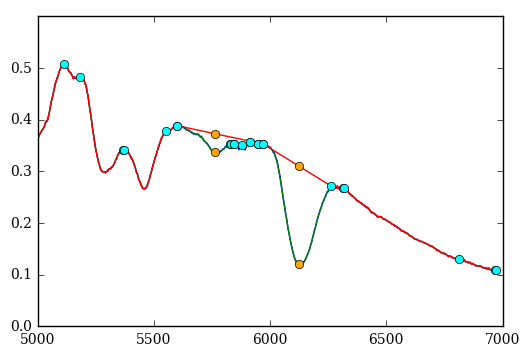

1994ae_combined 0.96 0.190381292124 Check:  0.001 413.479791922 452.17685898
0.142516757015 1248829.14486


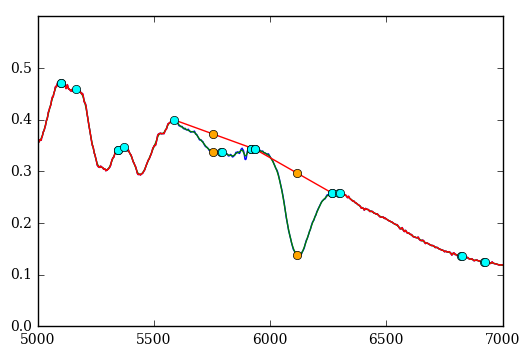

2001fe_combined 1.0 0.216855498517 Check:  0.001 204.167022852 189.912761375
0.353471607991 41733.0354466


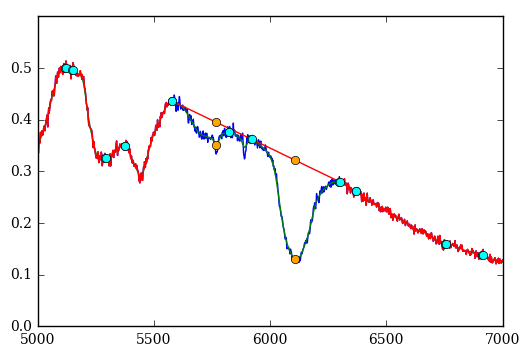

2000fa_combined 1.0 0.230912027893 Check:  0.0015 60.3070413876 64.4506237932
0.36663527548 91386.41035


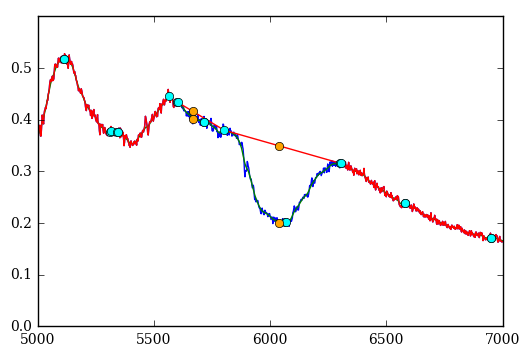

2003w_combined 1.14 0.0938941379492 Check:  0.0015 94.0508812863 92.0641834392
0.343770413351 68788.4402667


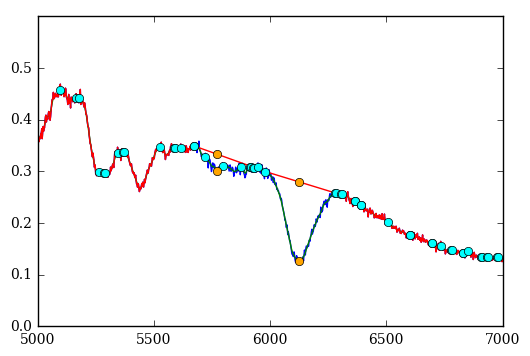

2007f_combined 0.96 0.20815577672 Check:  0.001 nan nan
0.154590882213 460447.381399


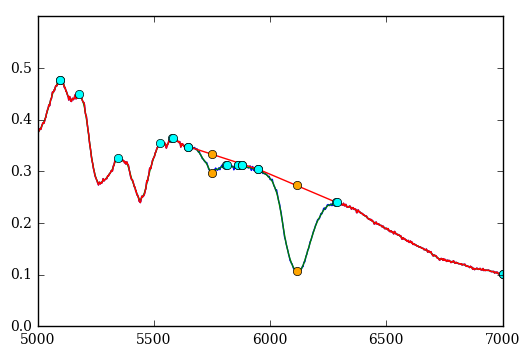

2008bf_combined 1.05 0.225908282029 Check:  0.001 122.358941891 111.330665515
0.336976581345 99703.7452603


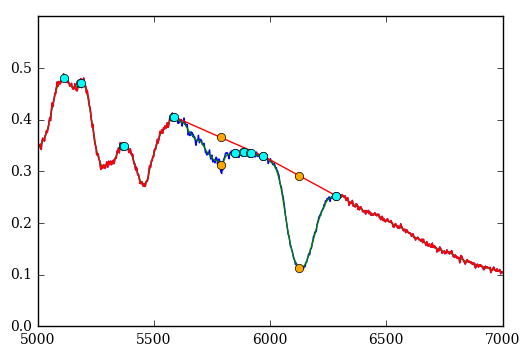

1998v_combined 0.99 0.298353636586 Check:  0.0015 89.8187623804 95.6527569684
0.131611784216 496364.704023


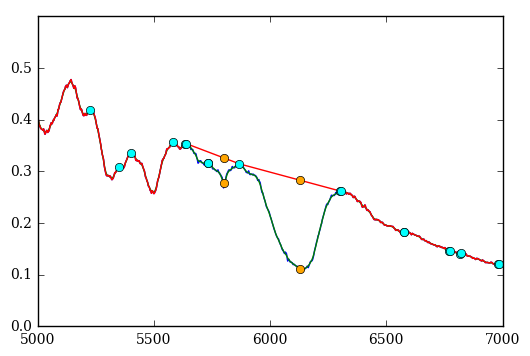

2001bf_combined 0.99 0.281657767646 Check:  0.001 115.161428627 103.881024102
0.294587996616 46449.1946914


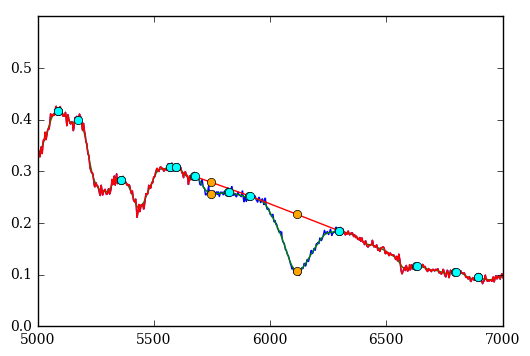

2005hc_combined 1.03 0.201329218042 Check:  0.002 59.3245465172 60.7200830321
0.146127222331 645878.522844


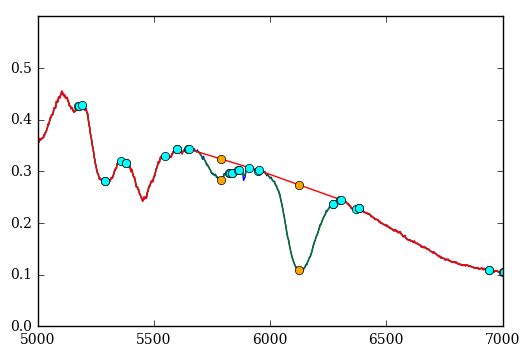

2007a_combined 0.95 0.249625038144 Check:  0.001 151.473599509 157.30968035
0.155928978662 2013468.19057


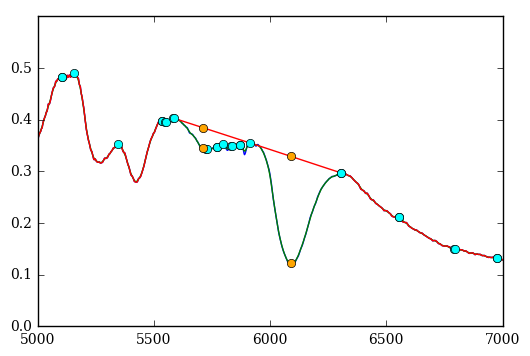

1998dk 1.05 0.193052412263 Check:  0.001 258.541844322 138.561375893
0.157355596336 15669.4093906


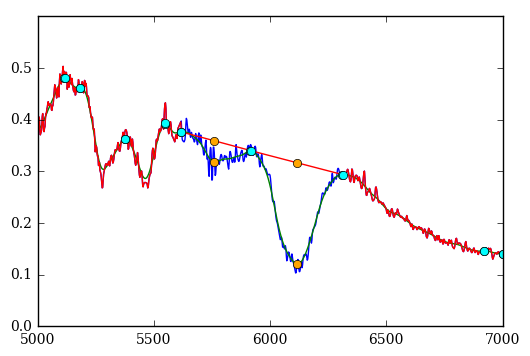

2005ms 1.02142208206 0.205899808307 Check:  0.003 29.7689043512 16.0601089496
0.156832161673 44745.1389439
Could not find maximum in a specified range!
2006or 1.06267601692 nan Check:  0.003 37.5240067447 19.6380646157
0.15974062174 55214.6822816


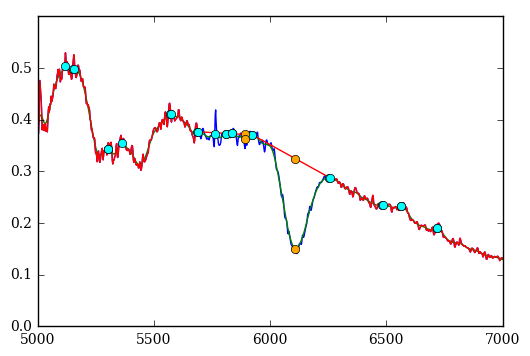

2007bz 1.05 0.0548870412952 Check:  0.002 41.5234281392 23.6312175845
0.147321239135 862153.151604


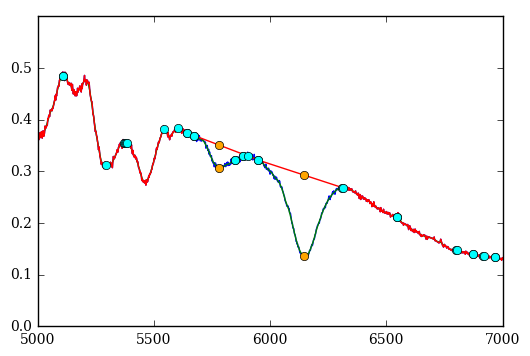

2007o 1.13613975141 0.286078139022 Check:  0.001 128.57950864 46.2065791613
0.437226380546 583.043006866


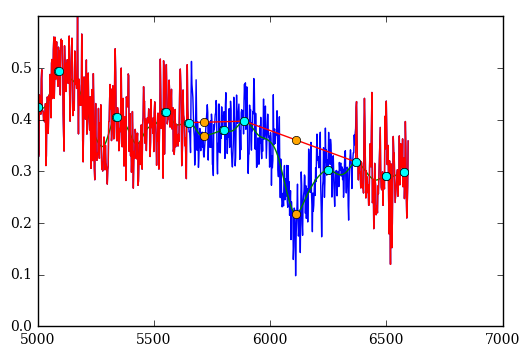

1996ab 1.01 0.18916834878 Check:  0.004 9.89077737866 5.14521199227
0.362203442459 13791.4320589


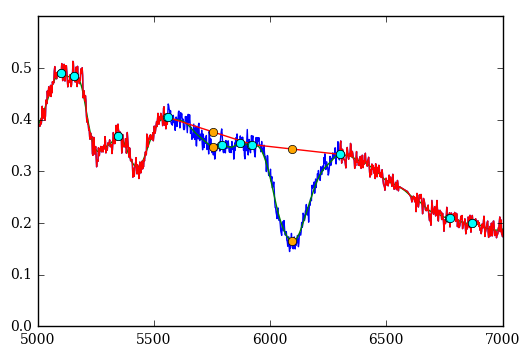

1996bl 1.07 0.1647591821 Check:  0.003 36.8294393511 19.5586070891
0.339999944495 25052.0780657


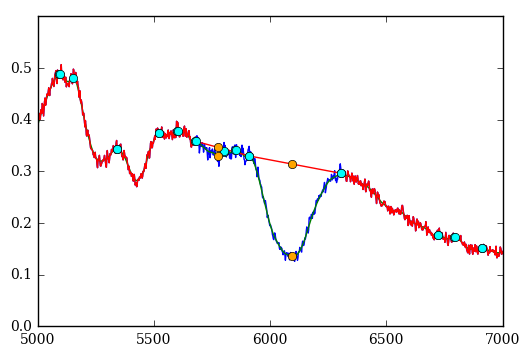

1998ec 1.08 0.0901768256607 Check:  0.002 46.180959185 25.4556344791
0.340185251339 36052.694608


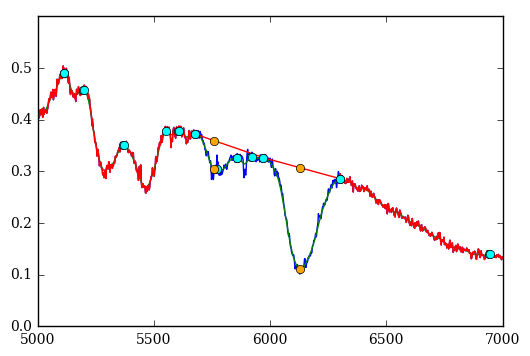

1998eg 1.14 0.280708200898 Check:  0.002 57.4152030737 32.3663049312
0.389718702447 10330.878269


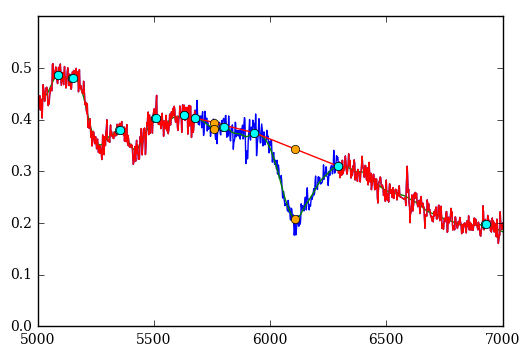

2001az 1.09 0.085299253783 Check:  0.003 35.3240256894 18.9991791822
0.37343067171 73066.8181647


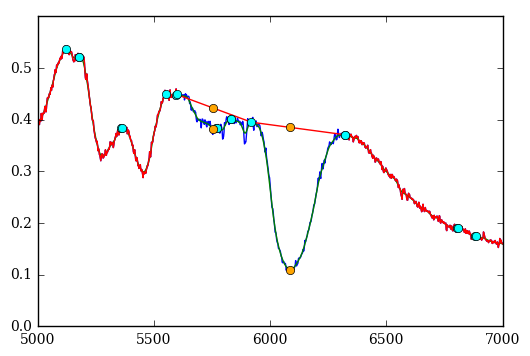

2001en 1.12 0.145045970242 Check:  0.0015 87.0916810669 48.5119253032
0.320079605062 6541.40543616


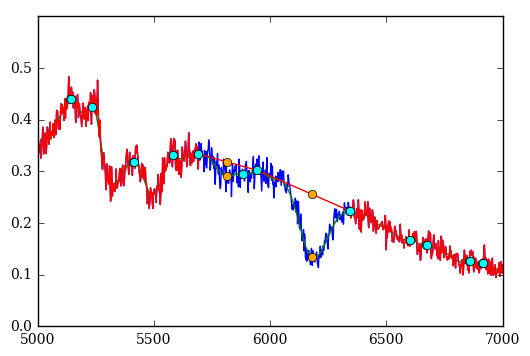

2002hu 1.05 0.22364050063 Check:  0.003 22.5629329198 12.5162474088
0.359129842685 49059.7007798


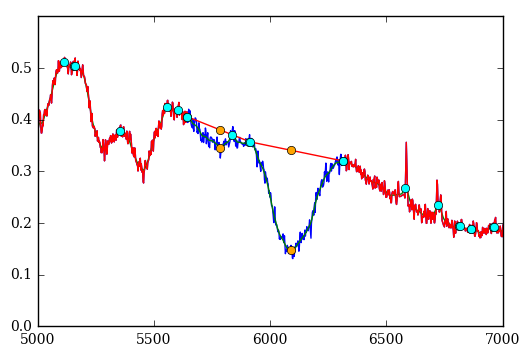

2003kc 1.14019986122 0.183528336837 Check:  0.0015 74.2374089293 40.1515779474
0.338465017286 17885.1026662


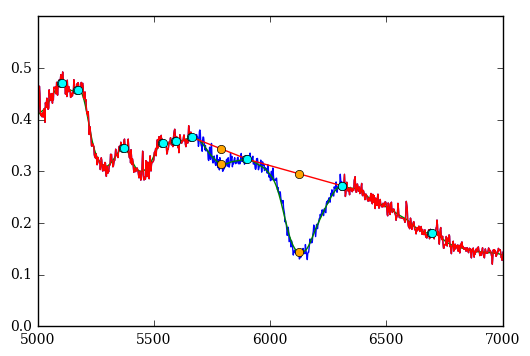

2004bg 1.05 0.193190958245 Check:  0.003 39.4603831421 22.1928311076
0.386327381638 2730.61143597


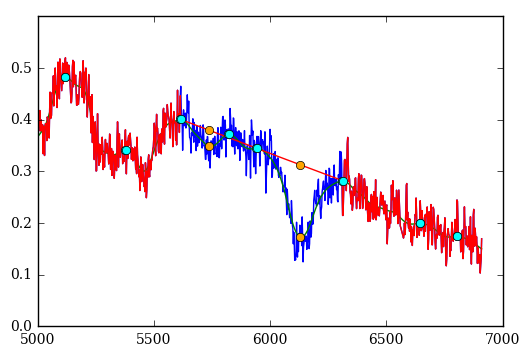

2007ae 0.98 0.223391937019 Check:  0.004 17.9823428883 9.7520371359
0.233949765544 24961.0758474


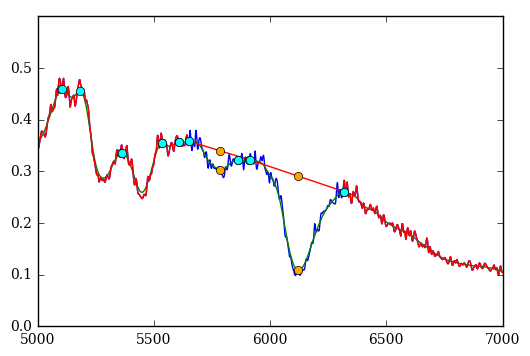

2004ey 1.00821961936 0.20429000915 Check:  0.003 32.1575514657 23.7522435175
0.209532054503 98884.0959611


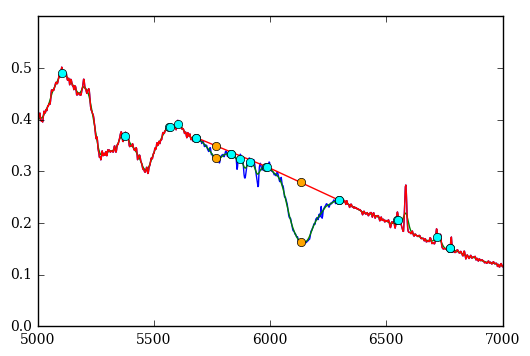

2005bg 1.06633511992 0.208514716212 Check:  0.0015 65.3167761743 38.7947571552
0.312632111285 14639.5180563


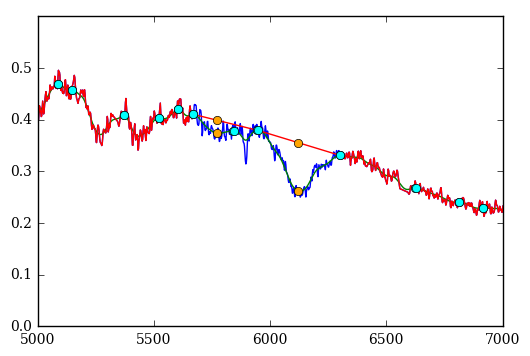

2006hx 1.05273249926 0.275747610959 Check:  0.003 36.9167018842 25.9064594346
0.181674138405 16544.4330721


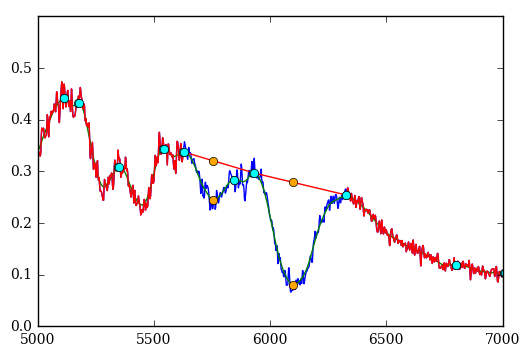

2006os 1.07098749844 0.38393953141 Check:  0.003 20.0211281722 13.4035978951
0.212264082049 72119.9587036


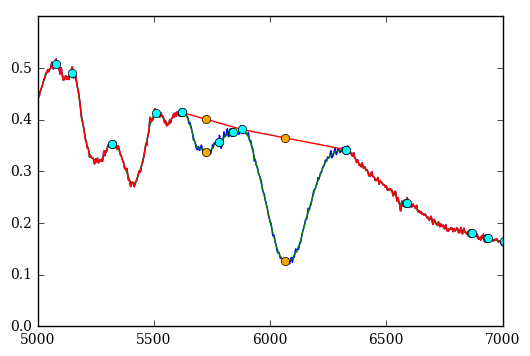

2007as 1.11396538206 0.263209808542 Check:  0.0015 65.3618173214 45.1748178915
0.204664509104 95403.5840828


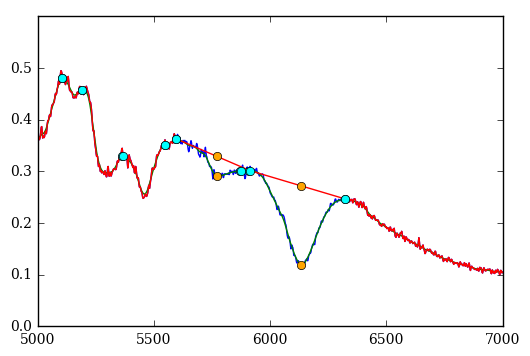

2008bq 1.00130644601 0.246851203841 Check:  0.002 55.1834152597 37.4970528421
0.464190805369 59806.042954
Could not find maximum in a specified range!
2001ba 1.03352873666 nan Check:  0.001 124.955687283 80.7913883177
0.427323989231 125767.034429
Could not find maximum in a specified range!
2012cg 1.039 nan Check:  0.001 158.670701169 93.0537888094
2
0.11436232466 652750.394862


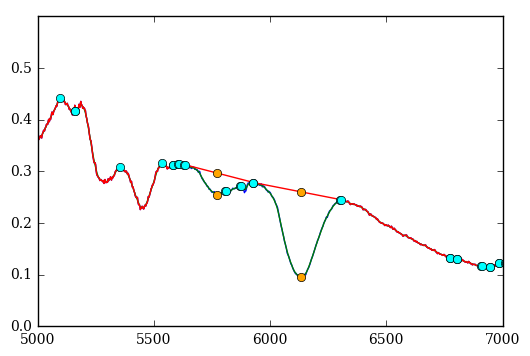

1995e_combined 1.16 0.258006209491 Check:  0.001 111.039936326 100.975602871
0.149269933712 2503277.84296


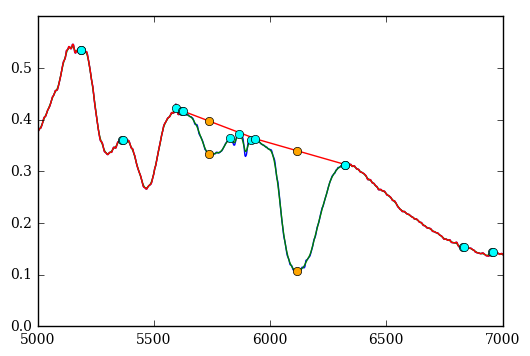

2002er_combined 1.23 0.273359950052 Check:  0.001 417.4591875 406.295853866
0.164085357005 24661.1072773


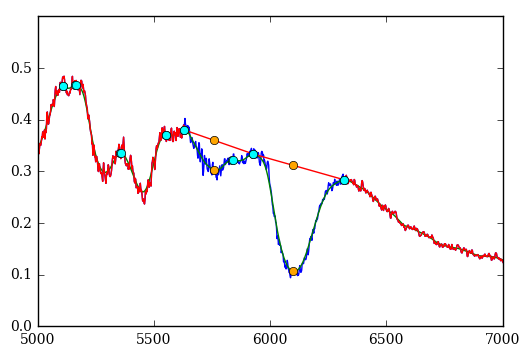

2003cq_combined 1.2 0.281176281705 Check:  0.003 35.0264085468 29.1265104346
0.317454555982 58997.4148851


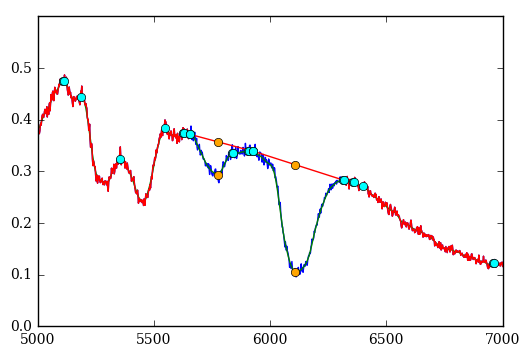

2002kf_combined 1.2 0.314647114939 Check:  0.0015 66.5143930996 72.0686492119
0.283691562607 554340.74931


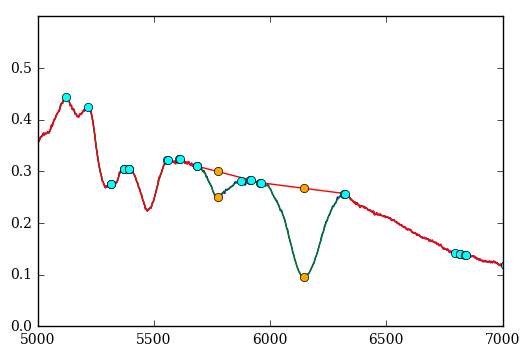

2002cr_combined 1.19 0.281605048692 Check:  0.001 189.864421481 202.706266813
0.131111861956 1873089.28763


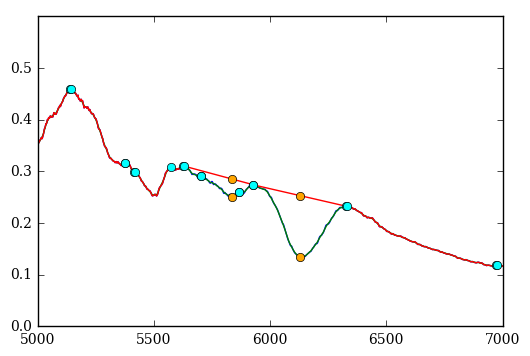

1999ac_combined 1.23 0.28878511666 Check:  0.001 229.98207632 209.157045802
0.140097505909 824040.425266


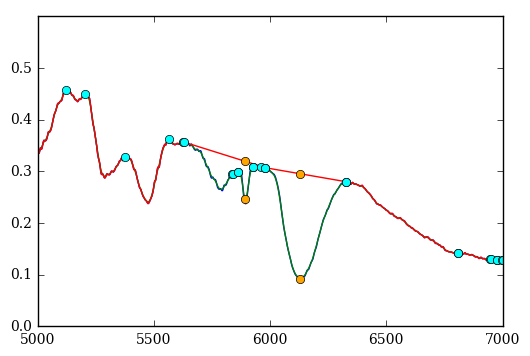

1999gd_combined 1.18 0.362686445471 Check:  0.001 158.082972651 153.082489539
0.225105189995 32227.0482261


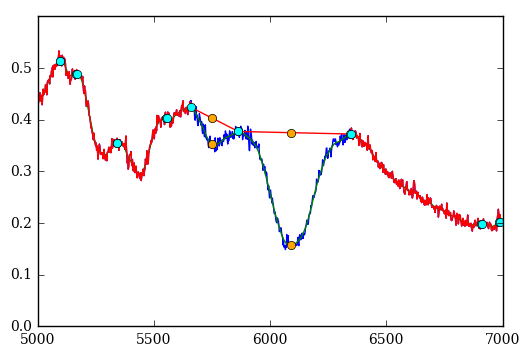

2007jg_combined 1.17 0.233071347583 Check:  0.002 50.2599347808 55.7574498991
0.295783823924 108837.334539


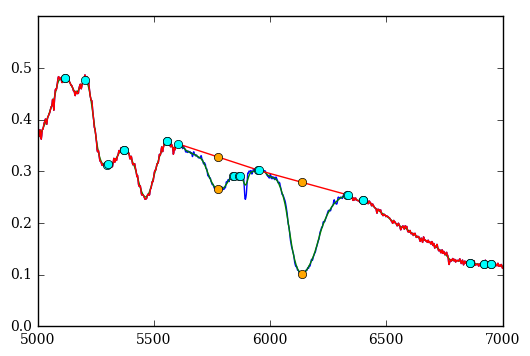

2005kc_combined 1.24 0.354785670233 Check:  0.0015 88.0927698523 94.8302708641
0.133763355052 303518.880396


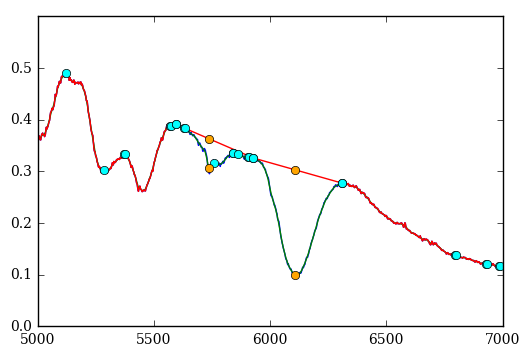

2007co_combined 1.16 0.281660212805 Check:  0.001 102.441184091 81.9557746405
0.211047701689 170670.409478


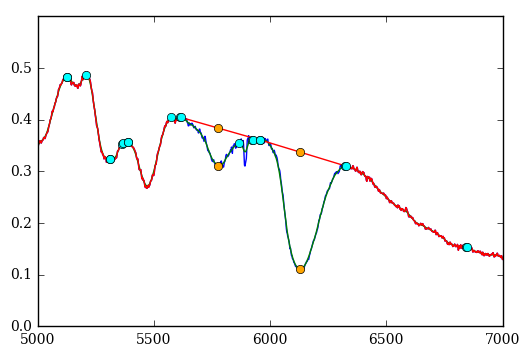

1997y_combined 1.15 0.320204697151 Check:  0.0015 95.8537815934 91.7270978743
0.182278411112 696012.786597


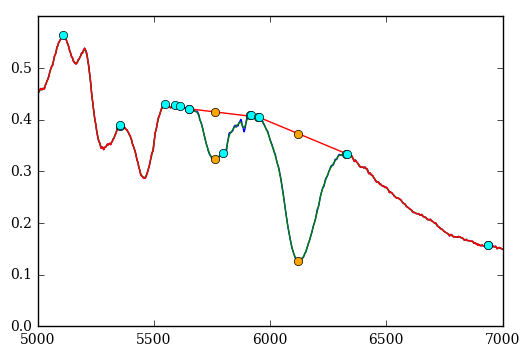

2002ha_combined 1.22 0.371407275842 Check:  0.001 215.895535122 206.122381164
0.321119531614 35816.4564613


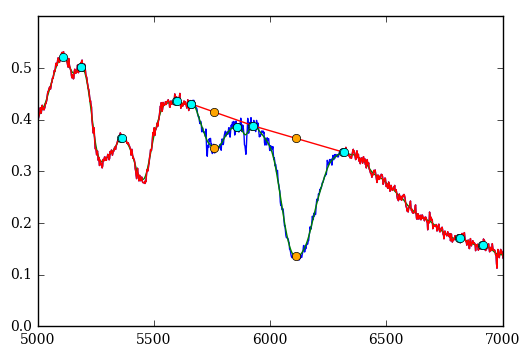

2003ch_combined 1.22 0.307327785396 Check:  0.002 56.3730244439 53.6128024025
0.162894402573 352012.674174


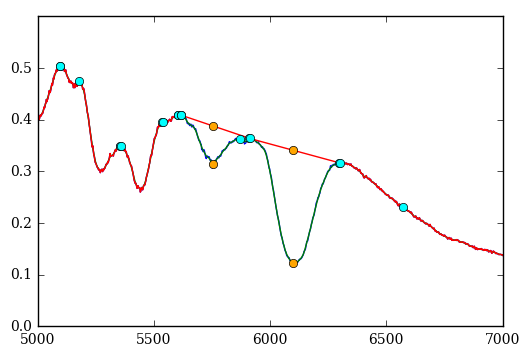

2006sr_combined 1.24 0.340437927389 Check:  0.001 135.740423399 119.075260481
0.0791922324355 1007.07288292


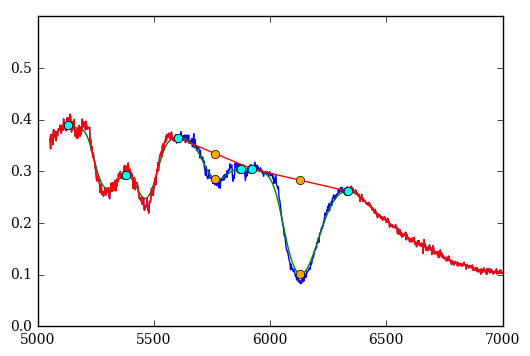

2005w 1.22957865079 0.269455208239 Check:  0.0045 3.55104413216 0.954451152042
0.308394247197 156129.374881


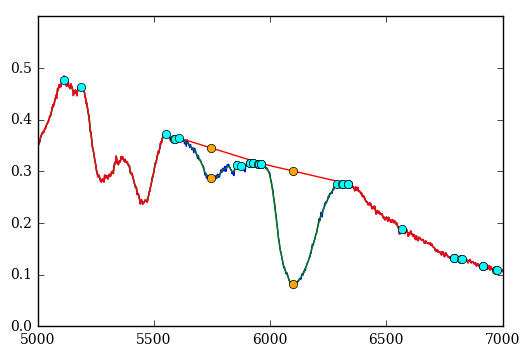

1998dh 1.17 0.269737353199 Check:  0.001 105.028769579 58.7863076969
3
0.249762970484 3447812.27649


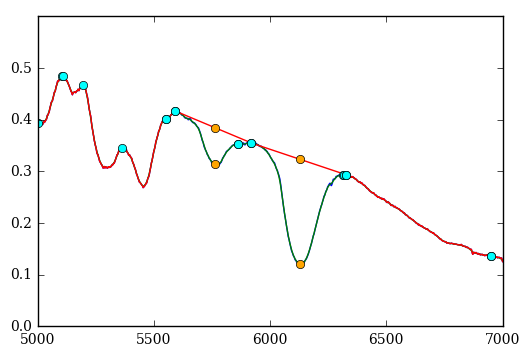

1994d_combined 1.37 0.346559585517 Check:  0.001 396.780152844 420.826892582
0.380315854337 374921.569565


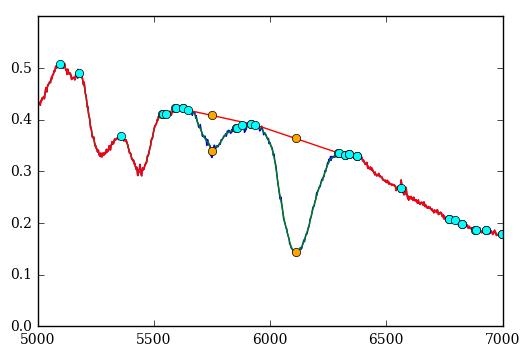

2003it_combined 1.36 0.316194823924 Check:  0.001 204.976912212 216.694493207
0.162584740368 1522.85328564
Could not find maximum in a specified range!
1992a_combined 1.39953907584 nan Check:  0.004 13.1095449188 6.86847042587
0.131397879004 7173509.81794


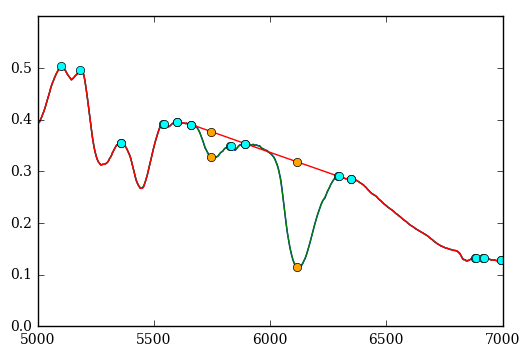

1996x_combined 1.26 0.244072914576 Check:  0.001 546.395288996 433.344179741
0.370492238582 10072.3585737


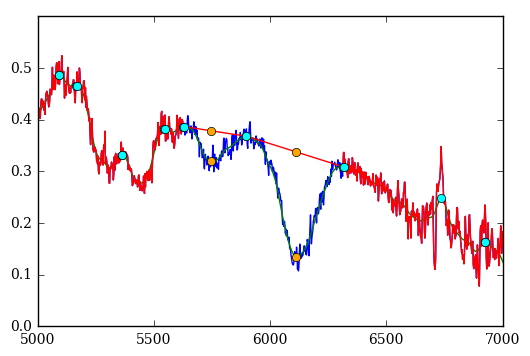

1998dx_combined 1.32 0.291655651824 Check:  0.003 33.4554201205 35.8906762264
0.297014368338 292636.662843


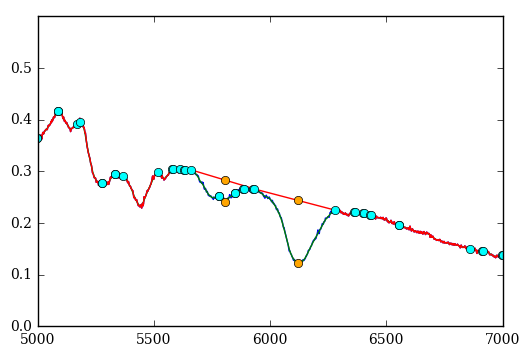

2005el_combined 1.27 0.349714301852 Check:  0.001 144.726818632 155.100204815
0.217575208467 61991.9413138


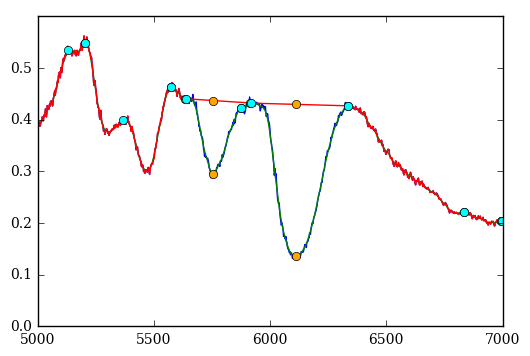

2004gs_combined 1.41 0.479776255045 Check:  0.0015 71.3986781239 63.9397958453
0.390410194067 14946.7464357


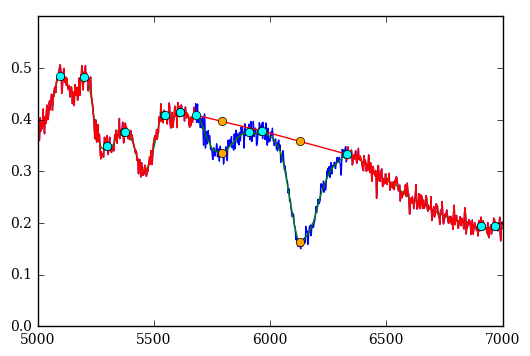

2006az_combined 1.29 0.316365692528 Check:  0.002 44.2994466621 46.5041547604
0.1543340079 3291977.86158


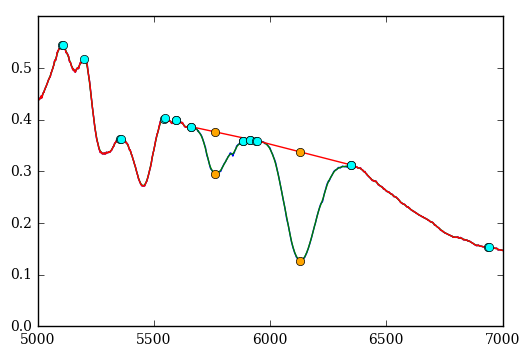

2006d_combined 1.35 0.384487992875 Check:  0.001 363.281615511 371.524982087
0.14249707285 1305465.08352


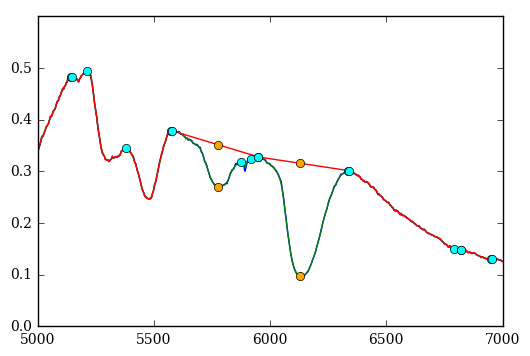

2001ep_combined 1.3 0.37518712711 Check:  0.001 199.926771664 190.969111682
0.260542453529 25495.1832037


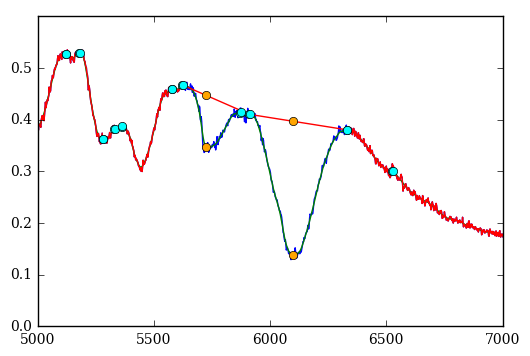

2004ef_combined 1.39 0.381361804731 Check:  0.0015 64.1789001321 75.9249664863
0.362247217769 35607.6873428


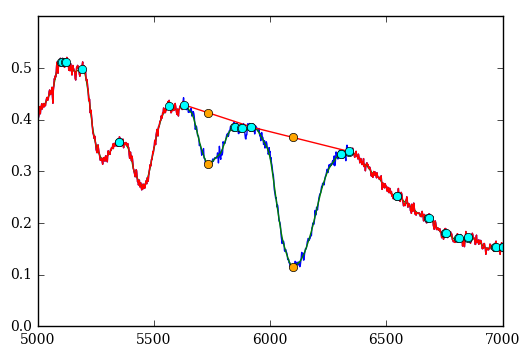

1999cc_combined 1.35 0.392958003745 Check:  0.0015 61.529116503 66.5598440635
0.295113932334 1294609.5948


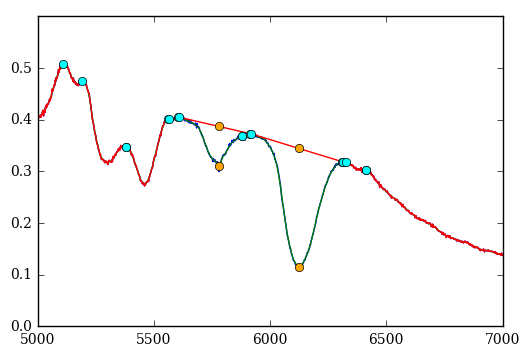

2005ki_combined 1.41 0.331094940732 Check:  0.001 220.610605861 226.087454967
0.244346188195 99733.8153201


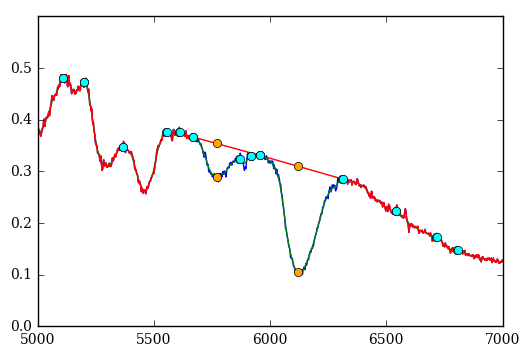

2005bo_combined 1.28 0.316606859225 Check:  0.0015 61.8203878326 67.7787814937
0.288409562846 74517.0523767


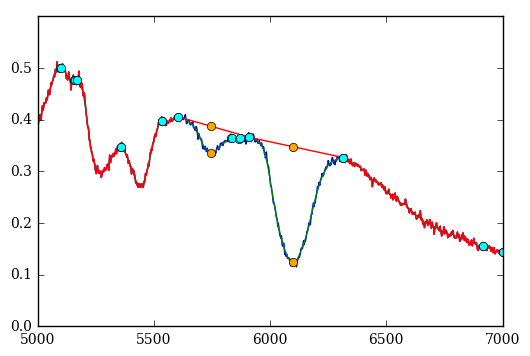

2007bd_combined 1.3 0.226953112688 Check:  0.0015 69.105199074 78.8815053642
0.0770208891125 851711.103307


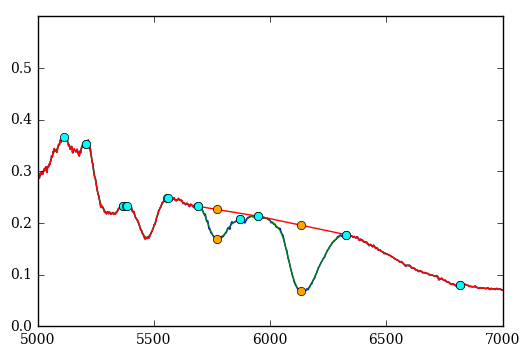

2007bc_combined 1.37 0.44950634202 Check:  0.0015 92.0580462094 88.6498391851
0.115307336152 228021.832998


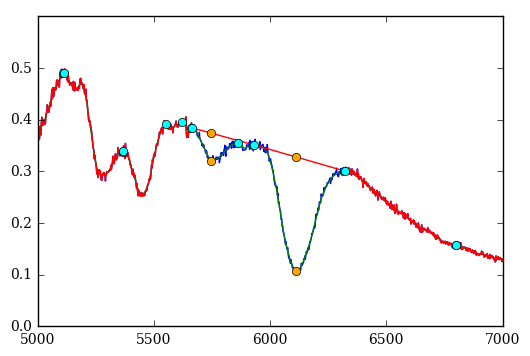

2005lz 1.34 0.241158742563 Check:  0.0015 68.994339279 25.0623713149
0.179562305679 343743.883856


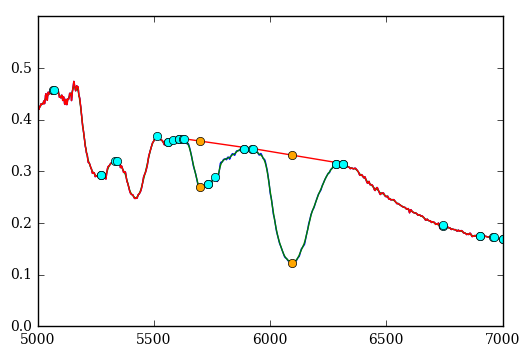

2006ej 1.26659174257 0.428192584713 Check:  0.001 117.255034691 64.7744839498
0.418023682905 7615.19850746


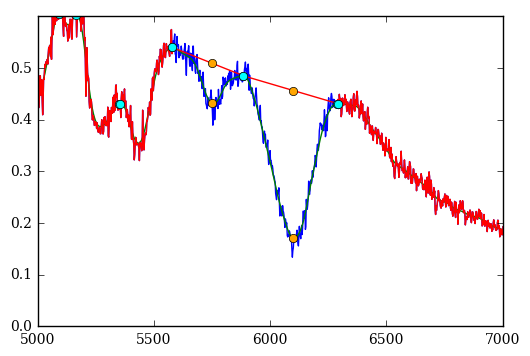

1994m 1.26 0.269931511686 Check:  0.003 26.7648188158 13.8634591514
0.403667453017 30184.0230697


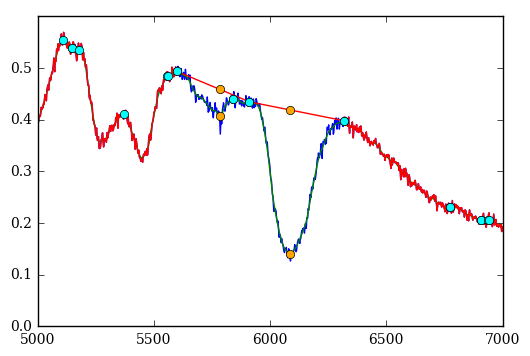

1998ef 1.27 0.186677173038 Check:  0.0015 62.5605373314 34.6307150194
0.34995328149 5762.54727695


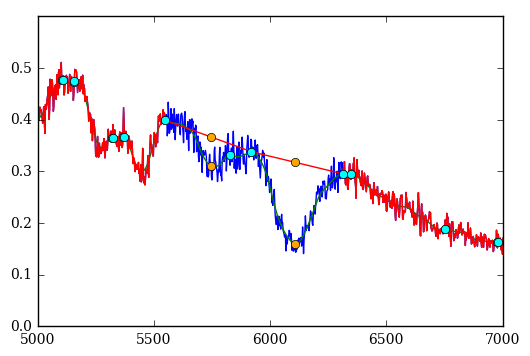

2002g 1.25 0.353342756558 Check:  0.003 23.0129184481 12.2289718425
0.378549243221 3843.5351072


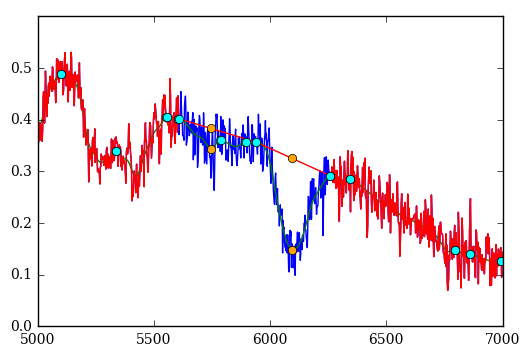

2003ic 1.30686535341 0.221627051816 Check:  0.003 21.9067776718 11.8898809655
0.323888734693 27471.8993112


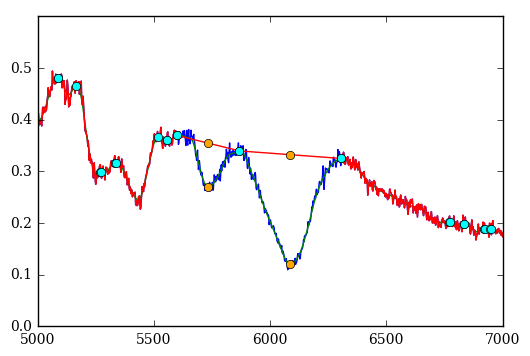

2005am 1.3 0.397194544241 Check:  0.002 51.4679921485 28.0974830128
0.346679530549 10408.7499584


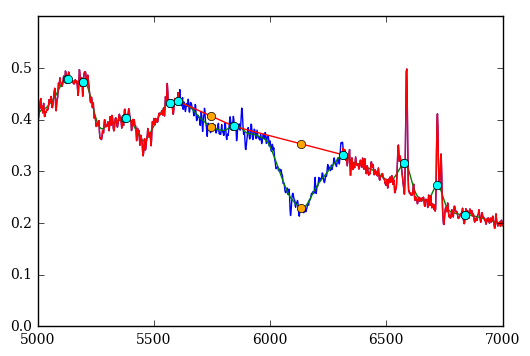

2006fw 1.28774437183 0.169328952031 Check:  0.003 32.8958794678 18.788086689
4
0.143780340752 209719.832768


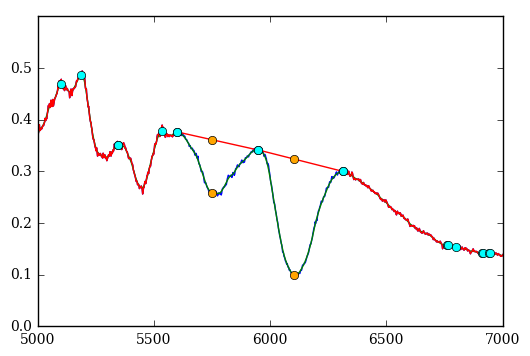

2007ci_combined 1.6 0.455610959796 Check:  0.0015 89.6316986047 78.6048869352
0.180548678917 473052.872728


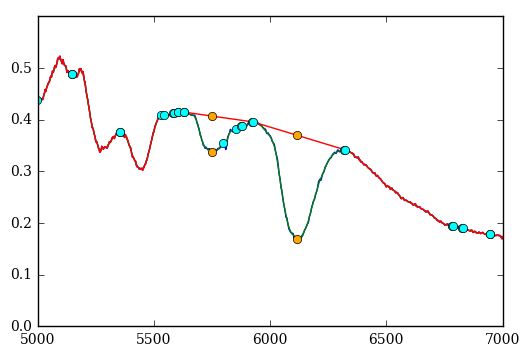

2006n_combined 1.5 0.348127704198 Check:  0.001 138.604217529 94.3551314545
0.374955253461 146238.284901


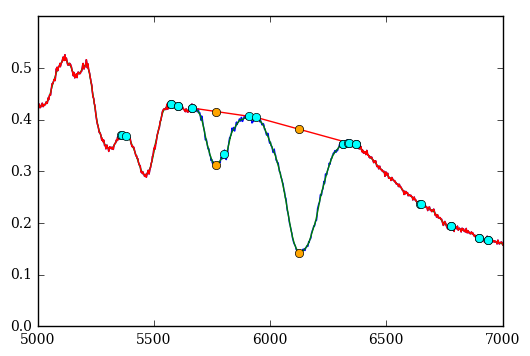

1999ej_combined 1.48 0.431861948049 Check:  0.001 125.250458155 133.026903438
0.194465382701 1033979.55088


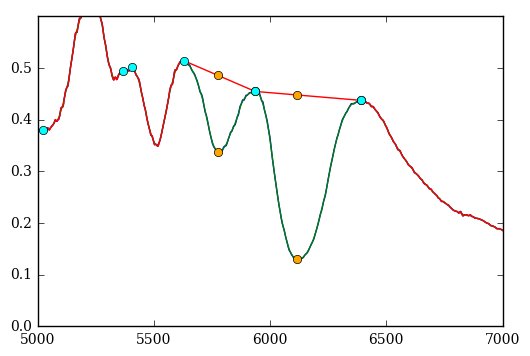

1999gh_combined 1.69 0.465014826692 Check:  0.001 251.709379595 201.639351668
0.435416399782 18680.4094565


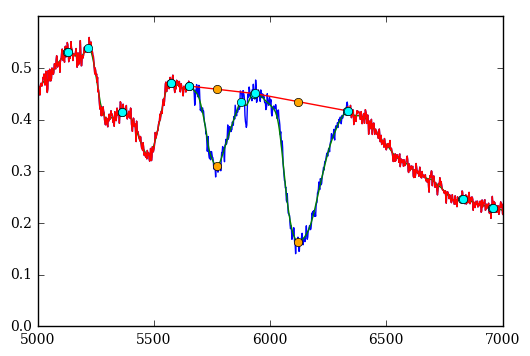

2006gj_combined 1.48 0.550477200673 Check:  0.002 52.1755068128 55.7065557677
0.356322576065 23045.8962384


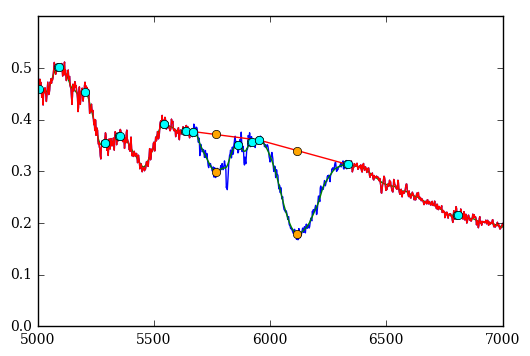

2001fh_combined 1.51 0.448716036258 Check:  0.002 46.6012372616 50.2853600742
0.2022806776 43730.9177908


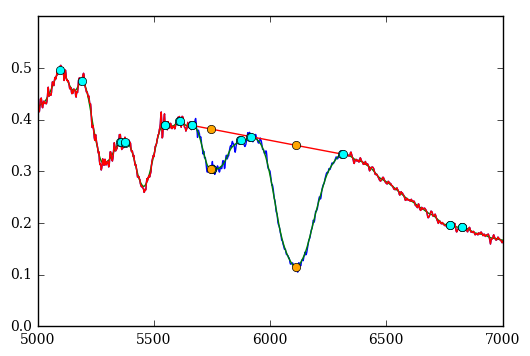

2003u_combined 1.46 0.326191822374 Check:  0.002 56.6485753736 55.7019722117
0.15677581502 444095.139434


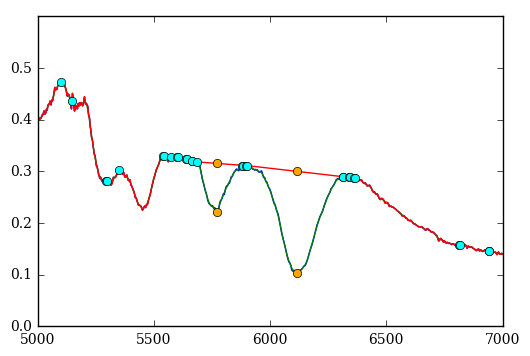

2006kf_combined 1.55 0.47498502678 Check:  0.001 111.889780822 112.421995918
0.373702244131 1361.87970811


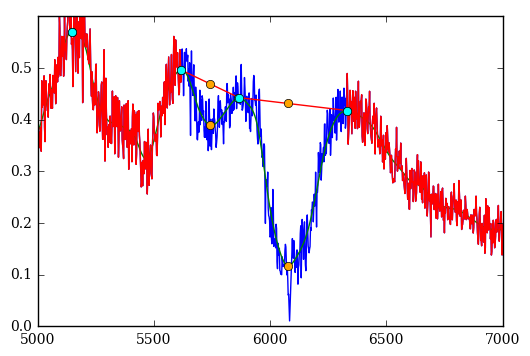

1994t_combined 1.51 0.256355616725 Check:  0.004 10.8699726159 11.2083001777
0.248603629715 28644.696662


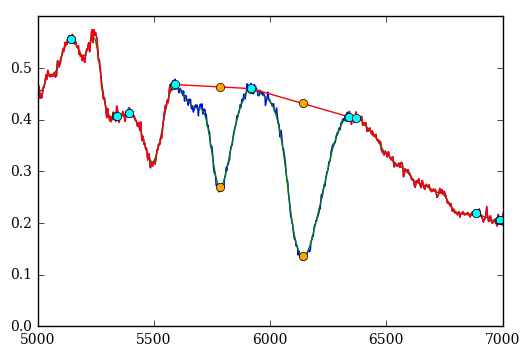

2006gt_combined 1.66 0.654855841456 Check:  0.002 49.1965069331 43.1387960165
0.234476467396 661403.701594


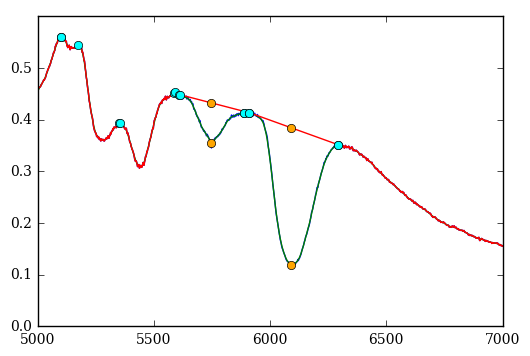

2002he_combined 1.44 0.295097627204 Check:  0.001 nan nan
0.175611203175 5952545.18308


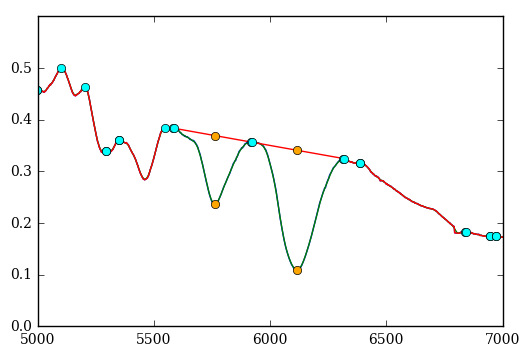

2007on_combined 1.64106422829 0.569059626287 Check:  0.001 548.749770505 422.872020934
0.361252962438 69784.6014461


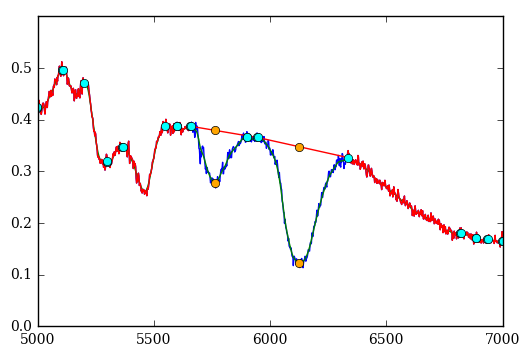

2003iv_combined 1.65 0.452967474588 Check:  0.0015 84.649583856 90.2907441681
0.174724981184 299305.920013


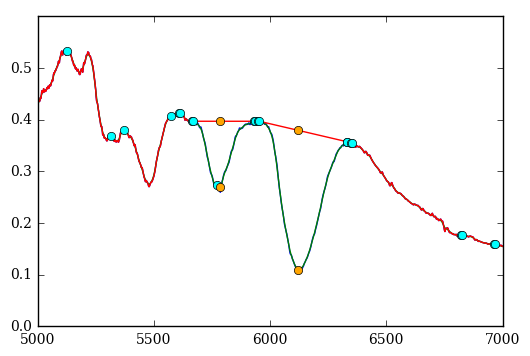

2000dk_combined 1.62 0.474250068897 Check:  0.001 119.191359862 105.899269147
0.414700034574 23631.4838121


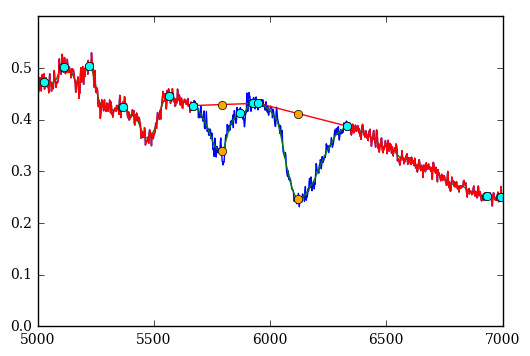

2002do 1.56 0.544504945557 Check:  0.002 54.2158824616 30.1768146952
0.339927296923 5433.93390086


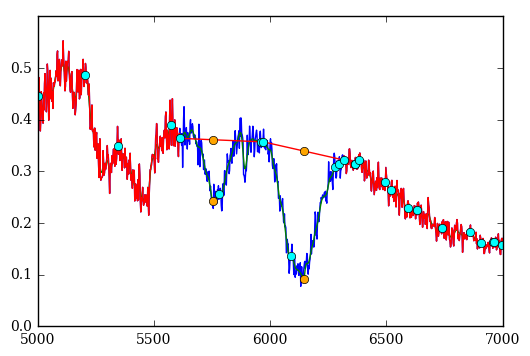

2002hw 1.44 0.476707192253 Check:  0.001 nan 11.3784076669
0.443517642474 12409.421782


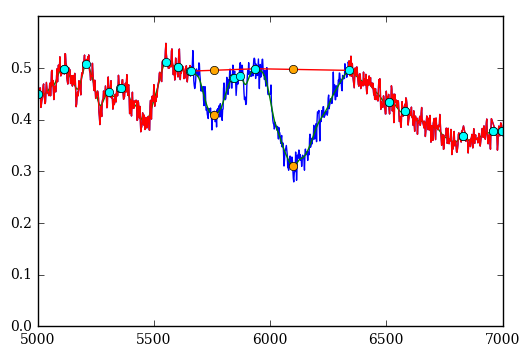

2005mc 1.63 0.466807048637 Check:  0.002 44.9317398934 25.5399137299
0.421104269494 4916.53060644


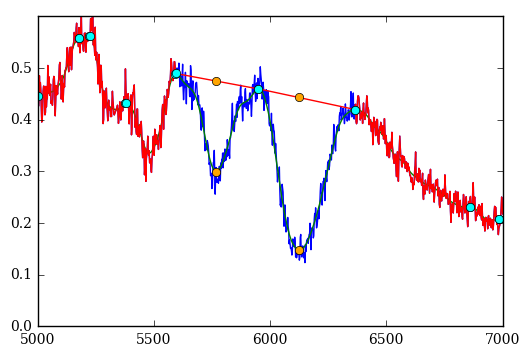

2007au 1.69 0.595156917459 Check:  0.003 27.6145844847 14.5619679101
0.278296699775 381841.799552


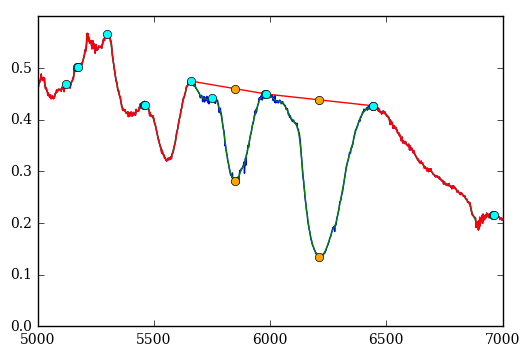

2008r 1.54 0.587724866942 Check:  0.001 174.078582576 40.9628225649
5
0.345346289871 84634.3167845


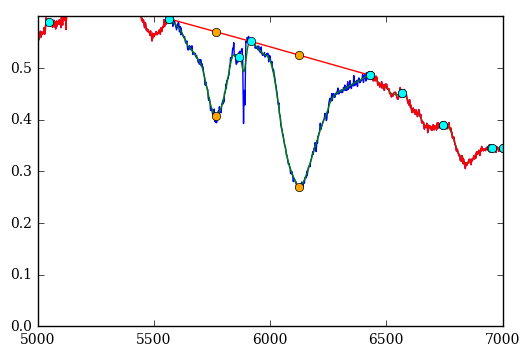

2006mr_combined 1.91637192734 0.63958051288 Check:  0.0015 90.748900261 98.8724207159
0.262057360262 55621.6138446


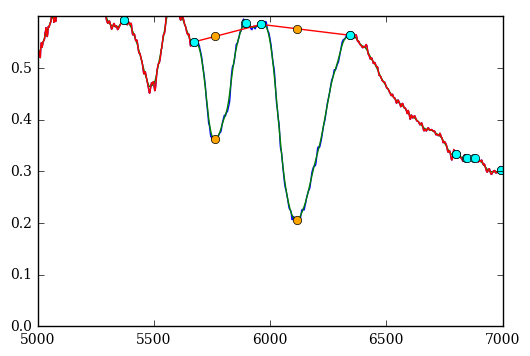

1999da_combined 1.9 0.535428362548 Check:  0.0015 78.304215971 66.283569136
0.290412201518 13140.2228383


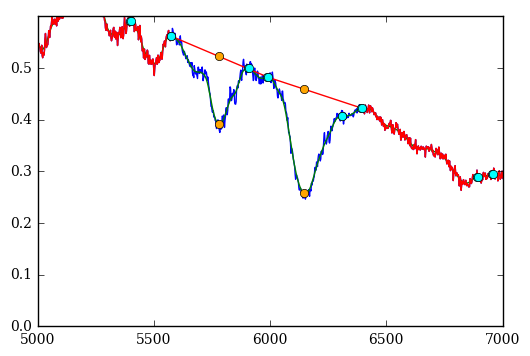

2007ax_combined 1.87 0.651664258392 Check:  0.002 57.3716983553 59.2409451712
0.491448359781 12652.1659243


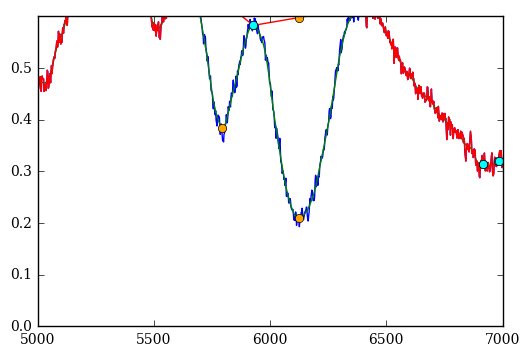

1998de_combined 1.88 0.634682518279 Check:  0.002 50.715803003 53.2281189304
0.341519256356 318081.351651


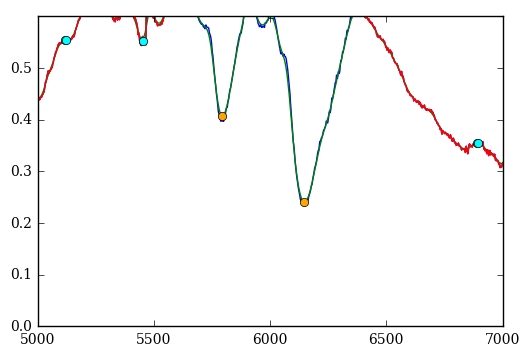

1999by_combined 1.97 0.671278923043 Check:  0.001 215.140224475 225.622343386
0.304605548277 31058.672706


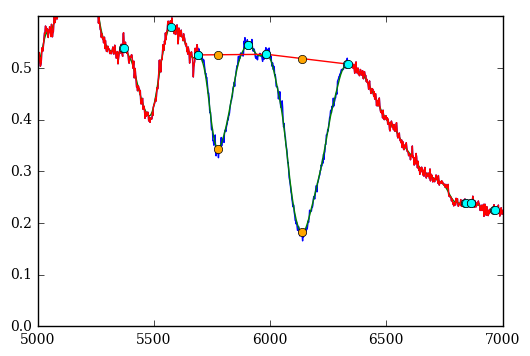

2007ba_combined 1.89 0.539900297991 Check:  0.002 53.9136061475 51.0041993496
0.303197645261 96700.0601051


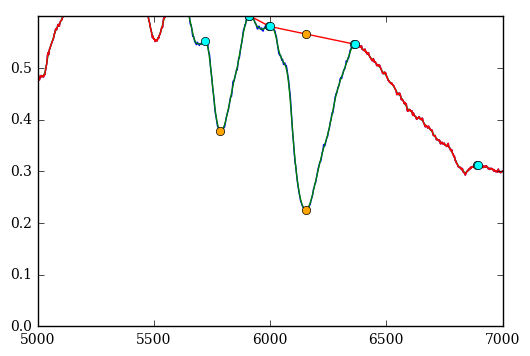

2005ke_combined 1.82 0.740274647937 Check:  0.001 155.734385065 120.682030865
0.463544029033 192492.190705


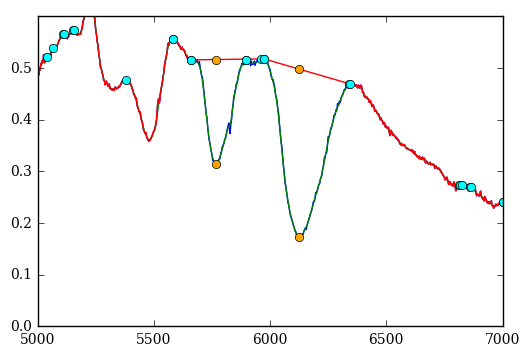

1998bp_combined 1.79 0.619387481713 Check:  0.001 178.18672757 183.88267285
0.449133461562 11796.825923


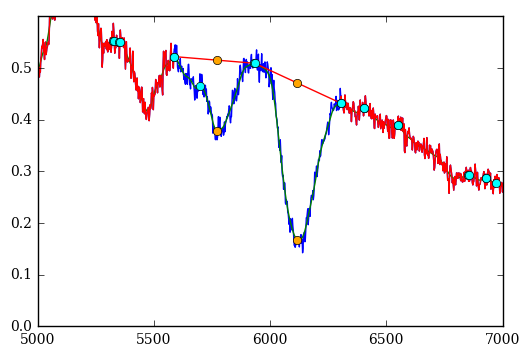

2002fb_combined 1.77 0.450408149835 Check:  0.002 42.3431747011 45.8817227147
0.287263502348 509286.784208


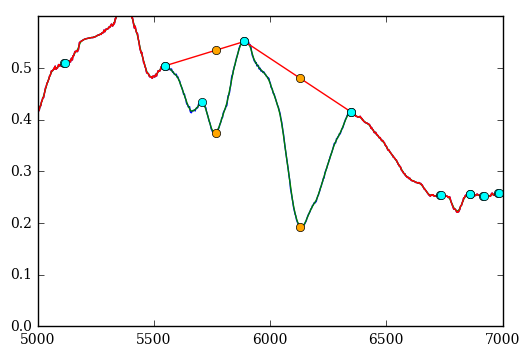

2009f_combined 1.86725515562 0.557609801524 Check:  0.001 249.54511718 233.638492503
0.293040152529 3377.95252969


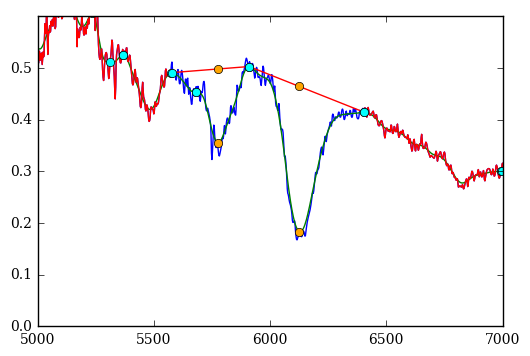

2006cs 1.9352579802 0.507883603412 Check:  0.003 27.7728215299 10.5900759504
0.274866427112 379646.250836


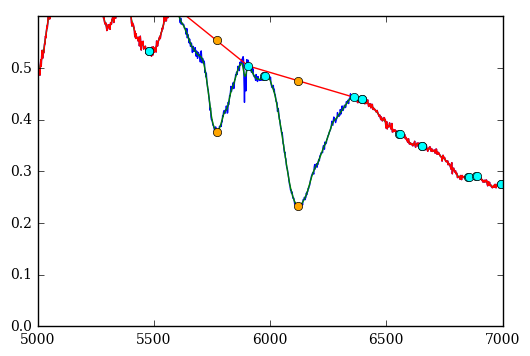

2007n 1.874690474 0.727030483007 Check:  0.001 141.483517393 54.7855706783
0.509579896672 5926.91938498


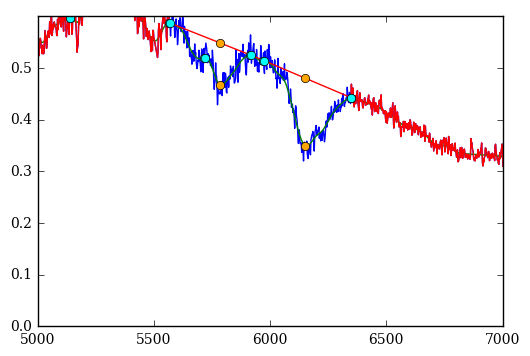

2007al 1.89 0.621399391668 Check:  0.003 37.9877481855 22.287016872


In [54]:
all_dm15s_med = []
all_ratios_med = []
i=0
bad_measurements = ['sn2004dt-20040816.413-ui-corrected.flm','sn1997bp-19970407.42-mmt.flm','sn2003W-20030207.40-fast.flm',
                    'sn2005A-20050107.25-fast.flm','SN08ia_081210_r01_NTT_EF.dat','SN06mr_061109_r01_CLA_LD.dat',
                    'sn2006bt-20060428.425-ui.flm', 'sn1998es-19981125-ui-corrected.flm','sn1999aa-19990223-ui.flm',
                    'sn1999dq-19990911.46-fast.flm','sn2001V-20010301.47-fast.flm','sn2007S-20070209.30-fast.flm',
                    'SN08fp_080921_b01_DUP_WF.dat','sn2001bf-20010516-ui-corrected.flm','sn2006cz-20060626.304-ui.flm',
                    'sn1999cl-19990612.17-fast.flm','sn2005el-20050928.47-fast.flm']
for sn_arr in sn_arrays_med:
    print i
    dm15_bin = []
    ratio_bin = []
    for SN in sn_arr:
        if SN.dm15_source != None:
            dm15 = SN.dm15_source
        else:
            dm15 = SN.dm15_from_fits
        var = 1./SN.ivar
        if SN.source != 'swift_uv' and SN.filename not in bad_measurements:
            print np.median(SN.flux[SN.x1:SN.x2]), np.median(SN.ivar[SN.x1:SN.x2])
#             vexp, SNR = sa.find_vexp(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            vexp, SNR = sa.autosmooth(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=vexp, dm15 = dm15)
            print SN.name, SN.dm15, r, 'Check: ', vexp, SNR, SN.SNR
            dm15_bin.append(SN.dm15)
            ratio_bin.append(r)
    all_dm15s_med.append(dm15_bin)
    all_ratios_med.append(ratio_bin)
    i+=1

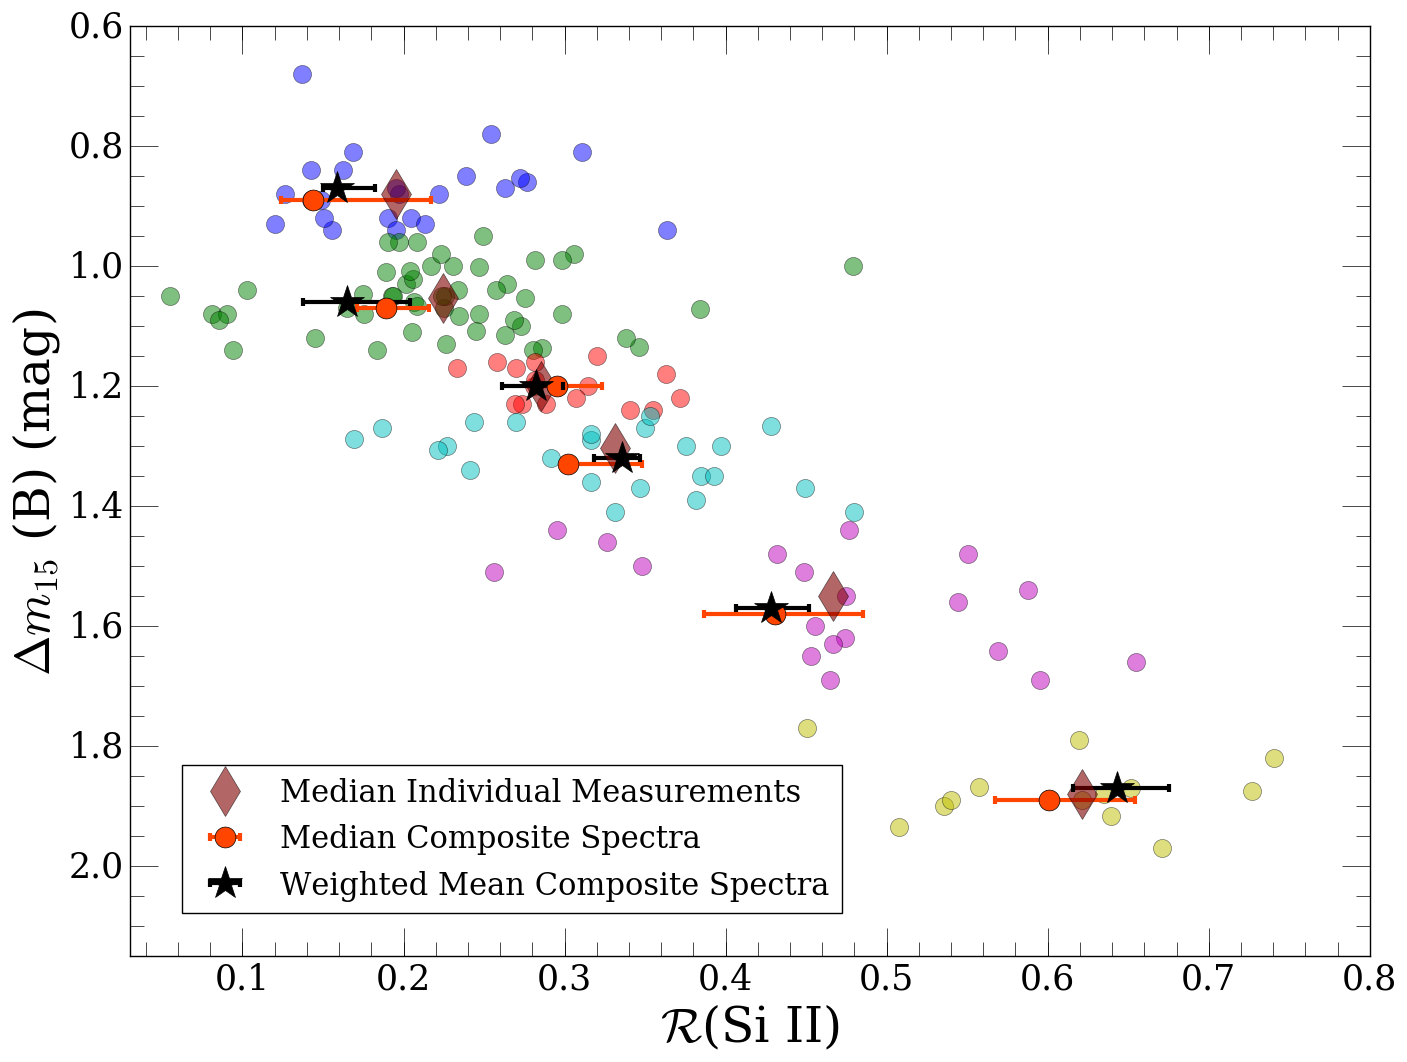

In [55]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 12, forward = True)
plt.minorticks_on()
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('$\mathcal{R}$(Si II)', fontsize = 35)
plt.ylabel('$\Delta m_{15}$ (B) (mag)', fontsize = 35)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
dm15_bin_medians = []
ratio_bin_medians = []
for i in range(len(all_dm15s_med)):
    dm15_bin_medians.append(np.nanmedian(all_dm15s_med[i]))
    ratio_bin_medians.append(np.nanmedian(all_ratios_med[i]))
    plt.plot(np.asarray(all_ratios_med[i]), all_dm15s_med[i], 'o', alpha=.5, markersize=13, zorder=1)
plt.plot(ratio_bin_medians, dm15_bin_medians, 'd', markersize=25, alpha=.6, color = 'maroon', label='Median Individual Measurements')
plt.errorbar(si_ratios_med, dm15s_med, xerr=errors_med, color = 'orangered', fmt='o', markersize=15, elinewidth=3, capthick=3, label='Median Composite Spectra')
plt.errorbar(si_ratios_mean, dm15s_mean, xerr=errors_mean, fmt='k*', markersize=25, elinewidth=3, capthick=3, label='Weighted Mean Composite Spectra')
plt.gca().invert_yaxis()
plt.xlim([0.03,0.8])
plt.ylim([2.15, 0.6])
# plt.legend(loc=3, fontsize = 20, numpoints=1)
plt.legend( loc=3, bbox_to_anchor=(0.03, 0.03, 0.48, 0.5), fontsize=22, numpoints=1)
# plt.savefig('../../../Paper_Drafts/main_composites_updated/si_ratio_wmedian.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/si_ratio_median.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
test_dm15s = []
test_ratios = []
for SN in sn_arrays_med[1]:
    if SN.dm15_source != None:
        dm15 = SN.dm15_source
    else:
        dm15 = SN.dm15_from_fits
    var = 1./SN.ivar
#     r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=.002, dm15 = dm15)
    print SN.filename, dm15, SN.phase

In [ ]:
comp1 = comps_dm15_max_fewer_bins_med[0]
comp2 = comps_dm15_max_fewer_bins_mean[0]

In [ ]:
r = sa.measure_si_ratio(comp2.wavelength[comp2.x1:comp2.x2], comp2.flux[comp2.x1:comp2.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_mean:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

In [ ]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()

In [ ]:
r = sa.measure_si_ratio(comp1.wavelength[comp1.x1:comp1.x2], comp1.flux[comp1.x1:comp1.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_med:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

In [ ]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()